In [1]:
filename = 'Data/VehiclesItaly.txt'

In [2]:
X = []
y = []
with open(filename,'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(",")]
        X.append(xt)
        y.append(yt)

In [3]:
print(X)
print('------')
print(y)

[145263.0, 204477.0, 361034.0, 616716.0, 885665.0, 773600.0, 850513.0, 996733.0, 827967.0, 1011436.0, 1222738.0, 2404651.0, 2259795.0, 2844588.0, 2774071.0, 3011089.0, 3169307.0, 3346791.0, 3702114.0, 5923476.0]
------
[127329.0, 312027.0, 573694.0, 891181.0, 1059114.0, 1221218.0, 1326513.0, 1543752.0, 1571053.0, 1658138.0, 1970521.0, 3744398.0, 4077166.0, 4404246.0, 4448146.0, 4915123.0, 5074261.0, 5850850.0, 5888472.0, 10008349.0]


In [4]:
num_training = int(0.8*len(X))
num_test = len(X) - num_training

In [5]:
import numpy as np

In [6]:
# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
X_train

array([[ 145263.],
       [ 204477.],
       [ 361034.],
       [ 616716.],
       [ 885665.],
       [ 773600.],
       [ 850513.],
       [ 996733.],
       [ 827967.],
       [1011436.],
       [1222738.],
       [2404651.],
       [2259795.],
       [2844588.],
       [2774071.],
       [3011089.]])

In [7]:
y_train = np.array(y[:num_training])
y_train

array([ 127329.,  312027.,  573694.,  891181., 1059114., 1221218.,
       1326513., 1543752., 1571053., 1658138., 1970521., 3744398.,
       4077166., 4404246., 4448146., 4915123.])

In [8]:
#Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
X_test

array([[3169307.],
       [3346791.],
       [3702114.],
       [5923476.]])

In [9]:
y_test= np.array(y[num_training:])
y_test

array([ 5074261.,  5850850.,  5888472., 10008349.])

In [10]:
from sklearn import linear_model

In [11]:
# Create linear regression object
linear_regressor = linear_model.LinearRegression()

#Train the model using the training data
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
y_train_pred = linear_regressor.predict(X_train)

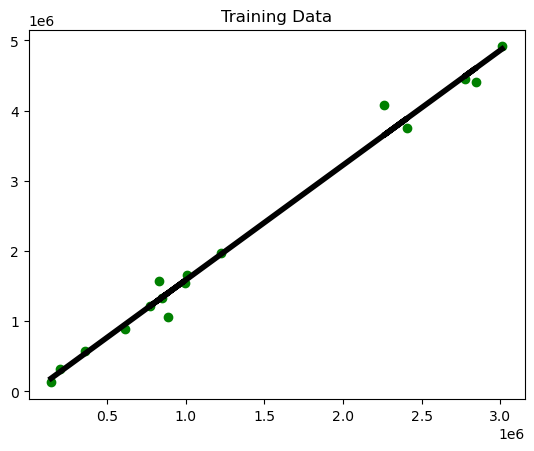

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training Data')
plt.show()

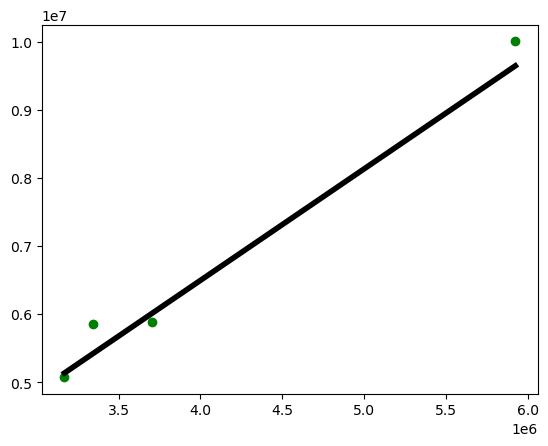

In [14]:
y_test_pred = linear_regressor.predict(X_test)
plt.figure()
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test,y_test_pred, color="black",linewidth=4)


In [15]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 241907.27
Mean squared error = 81974851872.13
Median absolute error = 240861.94
Explain variance score = 0.98
R2 score = 0.98


In [16]:
import pickle

output_model_file = "3_model_linear_regr.pkl"

with open(output_model_file,'wb') as f:
    pickle.dump(linear_regressor, f)

In [17]:
with open(output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)

In [18]:
y_test_pred_new = model_linregr.predict(X_test)

In [19]:
print("New mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))

New mean absolute error = 241907.27


# Ordinary Least Squares (OLS) and Regularization

## Ordinary Least Squares (OLS) Regression

- **What is OLS?**
  Ordinary Least Squares (OLS) is a method for finding the best-fitting line or model for your data by minimizing the difference (errors) between the predicted values and the actual data points. It works by trying to make these errors as small as possible for all the data points.

- **What's the problem with OLS?**
  OLS looks at every single data point when building the model, meaning it tries to fit the line or model perfectly to all the data. This can lead to **overfitting**. Overfitting happens when a model fits the training data too well (including noise or random variations), but it doesn't generalize well to new, unseen data.

  Imagine you have a wiggly, overly complex line (the dotted line mentioned in the graph). While it might fit the training data perfectly, it's not good at predicting new data because it has become too specific to the training set.

## Overfitting and Its Causes

- **Why does overfitting happen?**
  Overfitting often happens when there are a **large number of variables** (or features). In such cases, OLS tries to fit all these variables perfectly, but the model becomes too complex and sensitive to the specific training data. This means that the model:
  - Has **low bias**: It fits the training data really well (not missing the true relationship).
  - Has **high variance**: It performs poorly on new, unseen data because it is too "tuned" to the training data, making it sensitive to noise and randomness.

## Regularization: A Solution to Overfitting

- **What is regularization?**
  Regularization is a technique used to address overfitting by modifying the process of estimating the model parameters. Instead of finding the "perfect" model with OLS (which might lead to overfitting), regularization techniques add a constraint or penalty to the model, forcing it to simplify or "shrink" some of the parameters.

- **Why would we want a biased estimator?**
  In regularization, we allow some bias (meaning the model might not fit the training data perfectly), but this helps reduce the variance (making the model generalize better to new data). In simpler terms, we're okay with making the model a little "less perfect" on the training data if it helps the model work better on new, unseen data.

## How Does Regularization Work?

Regularization works by adding a penalty to the performance function, which is typically the sum of the squared errors. The idea is to **shrink** or **reduce** some of the coefficients in the model, especially for variables that don’t add much value, which makes the model simpler and less prone to overfitting.

### The Most Common Regularization Methods:

1. **Ridge Regression**: 
   - Adds a penalty to the size of the coefficients (the larger the coefficient, the bigger the penalty). 
   - This forces the model to "shrink" coefficients toward zero, but it doesn’t completely eliminate any variables.
   - Ridge is good when all variables should contribute to the model but we want to reduce their impact.

2. **Lasso Regression**:
   - Shrinks the coefficients and can also set some of them exactly to zero, effectively **removing irrelevant variables**.
   - This makes it useful for feature selection, where only the most important features remain in the model.

3. **ElasticNet**:
   - A combination of both Ridge and Lasso.
   - It adds both penalties, allowing for shrinking some coefficients and eliminating others.
   - Useful when you don’t know whether to use Ridge or Lasso, so it balances both techniques.

## Why Use Regularization?

- **Low Bias, High Variance Problem**: 
  OLS tends to have low bias (fits the training data very well) but high variance (doesn’t work well on new data).
  
- **Regularization** helps by introducing a bit of bias but reduces the variance, making the model more stable and less likely to overfit.

## Alternatives Like Dimensionality Reduction and Variable Selection

- **Dimensionality Reduction** or **Variable Selection** can also reduce the number of variables and improve the model, but they might:
  - Be **computationally expensive** (require a lot of computing power) in the case of variable selection.
  - Be **hard to interpret** in the case of dimensionality reduction (since you are combining features in ways that may not be intuitive).

## In Summary:

- **OLS** tries to fit the model perfectly but can overfit when there are many variables.
- **Regularization** (like Ridge, Lasso, and ElasticNet) adds a penalty to the model, making it simpler by shrinking some coefficients, helping to reduce overfitting.
- **Ridge** reduces the impact of less important features.
- **Lasso** can completely eliminate unimportant features.
- **ElasticNet** combines the strengths of both Ridge and Lasso.

By using these techniques, we can create a model that generalizes better and avoids overfitting, even with a large number of variables.


# Ridge Regression: A Detailed Explanation

Ridge regression, also known as **Tikhonov regularization**, is a technique used to handle multicollinearity (when independent variables in a model are highly correlated) and reduce overfitting. It is essentially an extension of ordinary least squares (OLS) regression that introduces a regularization term to the cost function.

## What is the Ridge Regression Formula?

The OLS cost function is designed to minimize the sum of squared errors (SSE) between the predicted and actual values. The cost function for OLS regression looks like this:

$SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - \mathbf{x}_i^T \boldsymbol{\beta})^2$

Where:
- $y_i$ is the actual value of the dependent variable for the $i$-th data point.
- $\hat{y}_i$ is the predicted value.
- $\mathbf{x}_i$ is the feature vector (i.e., the independent variables).
- $\boldsymbol{\beta}$ are the coefficients or parameters we are trying to estimate.
- $n$ is the number of data points.

In Ridge regression, the cost function adds a regularization term to the OLS cost function. The regularization term penalizes large coefficients, thereby helping to reduce overfitting.

The Ridge regression cost function is:

$\text{Cost function} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2$

Where:
- $\lambda$ (lambda) is the regularization parameter that controls the strength of the penalty.
- $\beta_j$ are the coefficients of the model.
- $p$ is the number of features (variables) in the model.

### What's Happening in the Ridge Formula?

1. **Sum of Squared Errors (SSE)**:
   - The first term in the Ridge cost function is the same as in OLS. It measures the difference between the predicted values ($\hat{y}_i$) and the actual values ($y_i$) for all data points. The goal is to minimize this error.

2. **Regularization Term**:
   - The second term, $\lambda \sum_{j=1}^{p} \beta_j^2$, is the regularization term. It penalizes large coefficients by adding the sum of the squared coefficients to the cost function.
   - $\lambda$ is a hyperparameter that controls how much regularization is applied. When $\lambda$ is large, the penalty is larger, and the model is forced to have smaller coefficients. When $\lambda = 0$, Ridge regression becomes equivalent to OLS, as no regularization is applied.

### Intuition Behind Ridge Regression

In OLS, the goal is to minimize the error between the predictions and the actual values. However, OLS can produce models that overfit the data, especially when there are many features or when the features are highly correlated (multicollinearity). In these cases, OLS can produce large coefficients that make the model sensitive to noise in the training data.

Ridge regression helps address these problems by:
- Adding a penalty for large coefficients, which forces the model to keep the coefficients small.
- By shrinking the coefficients, Ridge reduces the model's variance, making it less sensitive to the training data and improving its ability to generalize to new, unseen data.

### Effect of $\lambda$ (the Regularization Parameter)

- **When $\lambda = 0$**: The model is the same as OLS, and no regularization is applied. The coefficients will be whatever OLS produces, and if there's multicollinearity or overfitting, this model might not generalize well.
  
- **As $\lambda$ increases**: The regularization strength increases. Coefficients are shrunk toward zero, and the model becomes simpler. This helps in reducing overfitting.

- **When $\lambda$ is very large**: The regularization term dominates the cost function, forcing the coefficients to become very small or close to zero. The model may then underfit because it has become too simple.

### Geometric Interpretation of Ridge Regression

In a high-dimensional space, Ridge regression tries to fit a solution that is within a constrained region (an "ellipsoid") defined by the regularization term. It trades off between fitting the data perfectly (which would lead to overfitting) and constraining the coefficients to avoid large values, thus improving generalization.

### Solving Ridge Regression

Ridge regression is often solved using the **closed-form solution** (normal equation) or iterative techniques such as **gradient descent**.

The **closed-form solution** for Ridge regression is:

$\boldsymbol{\beta}_{\text{ridge}} = (\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y}$

Where:
- $\mathbf{X}$ is the matrix of features.
- $\mathbf{y}$ is the vector of actual values.
- $\mathbf{I}$ is the identity matrix.
- $\lambda$ is the regularization parameter.

In comparison to the OLS solution, $\boldsymbol{\beta}_{\text{ols}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$, Ridge regression adds $\lambda \mathbf{I}$, which acts as a "smoothing" term, preventing the coefficients from becoming too large.

### Pros and Cons of Ridge Regression

#### Pros:
- **Reduces overfitting**: By penalizing large coefficients, Ridge regression prevents the model from fitting the noise in the training data.
- **Handles multicollinearity**: Ridge is particularly useful when features are highly correlated, as it reduces the variance and improves the stability of the coefficient estimates.
- **Improves generalization**: It helps models perform better on unseen data.

#### Cons:
- **Bias-Variance tradeoff**: Ridge introduces some bias into the model, but this bias helps reduce variance, leading to better overall performance.
- **Feature selection**: Unlike Lasso regression, Ridge regression doesn’t set coefficients exactly to zero, so it doesn’t help with feature selection.

### Summary

Ridge regression modifies the ordinary least squares (OLS) method by adding a regularization term that penalizes large coefficients. This helps prevent overfitting and makes the model more robust to new data, especially when there are many correlated features or when the dataset is small. The regularization term is controlled by $\lambda$, and the key challenge is finding the right balance between fitting the data well and keeping the model simple to generalize better on unseen data.

# Example of Ridge Regression Computation

Let’s walk through a mathematical example of computing Ridge regression step by step.

### Example Setup

Let's consider a simple dataset with two features ($X_1$ and $X_2$) and one target variable ($y$) for three data points:

| $X_1$ | $X_2$ | $y$  |
|-----------|-----------|----------|
| 1         | 2         | 1        |
| 2         | 3         | 2        |
| 3         | 4         | 3        |

### Step 1: Set Up Matrices

We need to represent this data in matrix form. In Ridge regression, we use the **design matrix** $\mathbf{X}$ for the features and the vector $\mathbf{y}$ for the target values:

$\mathbf{X} = \begin{bmatrix}
1 & 2 \\
2 & 3 \\
3 & 4
\end{bmatrix}$

and

$\mathbf{y} = \begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}$

### Step 2: Ridge Regression Formula

The Ridge regression solution is given by the following formula:

$\boldsymbol{\beta}_{\text{ridge}} = (\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y}$

Where:
- $\mathbf{X}^T$ is the transpose of the matrix $\mathbf{X}$.
- $\mathbf{X}^T \mathbf{X}$ is the product of the transpose of $\mathbf{X}$ and $\mathbf{X}$.
- $\lambda$ is the regularization parameter.
- $\mathbf{I}$ is the identity matrix of appropriate size.
- $\mathbf{X}^T \mathbf{y}$ is the product of the transpose of $\mathbf{X}$ and the vector $\mathbf{y}$.

### Step 3: Compute $\mathbf{X}^T \mathbf{X}$

First, compute $\mathbf{X}^T$, the transpose of $\mathbf{X}$:

$\mathbf{X}^T = \begin{bmatrix}
1 & 2 & 3 \\
2 & 3 & 4
\end{bmatrix}$

Now, compute $\mathbf{X}^T \mathbf{X}$:

$\mathbf{X}^T \mathbf{X} = \begin{bmatrix}
1 & 2 & 3 \\
2 & 3 & 4
\end{bmatrix} \begin{bmatrix}
1 & 2 \\
2 & 3 \\
3 & 4
\end{bmatrix} = \begin{bmatrix}
14 & 20 \\
20 & 29
\end{bmatrix}$

### Step 4: Add the Regularization Term $\lambda \mathbf{I}$

Let’s assume $\lambda = 1$ and $\mathbf{I}$ is the identity matrix of size $2 \times 2$ (since there are two features):

$\mathbf{I} = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}$

Now, compute $\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I}$:

$\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I} = \begin{bmatrix}
14 & 20 \\
20 & 29
\end{bmatrix} + 1 \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix} = \begin{bmatrix}
15 & 20 \\
20 & 30
\end{bmatrix}$

### Step 5: Compute $(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1}$

Now we need to find the inverse of the matrix $\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I}$:

$\mathbf{A} = \begin{bmatrix}
15 & 20 \\
20 & 30
\end{bmatrix}$

The inverse of a $2x2$ matrix $\mathbf{A} = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$ is given by:

$\mathbf{A}^{-1} = \frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}$

For our matrix:

$ad - bc = 15 \times 30 - 20 \times 20 = 450 - 400 = 50$

So the inverse is:

$(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} = \frac{1}{50} \begin{bmatrix} 30 & -20 \\ -20 & 15 \end{bmatrix} = \begin{bmatrix} 0.6 & -0.4 \\ -0.4 & 0.3 \end{bmatrix}$

### Step 6: Compute $\mathbf{X}^T \mathbf{y}$

Next, compute the product $\mathbf{X}^T \mathbf{y}$:

$\mathbf{X}^T \mathbf{y} = \begin{bmatrix} 1 & 2 & 3 \\ 2 & 3 & 4 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 14 \\ 20 \end{bmatrix}$

### Step 7: Compute the Ridge Coefficients

Finally, compute the Ridge regression coefficients:

$\boldsymbol{\beta}_{\text{ridge}} = (\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y}$

$\boldsymbol{\beta}_{\text{ridge}} = \begin{bmatrix} 0.6 & -0.4 \\ -0.4 & 0.3 \end{bmatrix} \begin{bmatrix} 14 \\ 20 \end{bmatrix} = \begin{bmatrix} (0.6 \times 14) + (-0.4 \times 20) \\ (-0.4 \times 14) + (0.3 \times 20) \end{bmatrix}$

$\boldsymbol{\beta}_{\text{ridge}} = \begin{bmatrix} 8.4 - 8 \\ -5.6 + 6 \end{bmatrix} = \begin{bmatrix} 0.4 \\ 0.4 \end{bmatrix}$

### Conclusion

The Ridge regression coefficients are:

$\beta_1 = 0.4$ and $\beta_2 = 0.4$

So, the final Ridge regression equation for this example is:

$\hat{y} = 0.4 X_1 + 0.4 X_2$

By adding the regularization term, we’ve forced the coefficients to be smaller compared to ordinary least squares (OLS), which helps prevent overfitting, especially when dealing with multicollinearity or high variance.

# Ordinary Least Squares (OLS) Regression: Detailed Example

## Example Setup

We will use the same dataset as in the Ridge regression example:

| $X_1$ | $X_2$ | $y$  |
|-----------|-----------|----------|
| 1         | 2         | 1        |
| 2         | 3         | 2        |
| 3         | 4         | 3        |

### Step 1: Set Up Matrices

Just like in Ridge regression, we represent the data in matrix form:

$X = \begin{bmatrix} 1 & 2 \\ 2 & 3 \\ 3 & 4 \end{bmatrix}$ 

and 

$y = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$.

### Step 2: OLS Formula

The OLS solution is given by the following formula:

$\beta_{\text{ols}} = (X^T X)^{-1} X^T y$

Where:
- $X^T$ is the **transpose** of the matrix $X$.
- $X^T X$ is the product of the transpose of $X$ and $X$.
- $(X^T X)^{-1}$ is the **inverse** of $X^T X$.
- $X^T y$ is the product of the transpose of $X$ and the vector $y$.

### Step 3: Compute $X^T X$

First, compute $X^T$, the transpose of $X$:

$X^T = \begin{bmatrix} 1 & 2 & 3 \\ 2 & 3 & 4 \end{bmatrix}$

Now, compute $X^T X$:

$X^T X = \begin{bmatrix} 1 & 2 & 3 \\ 2 & 3 & 4 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 2 & 3 \\ 3 & 4 \end{bmatrix} = \begin{bmatrix} 14 & 20 \\ 20 & 29 \end{bmatrix}$

### Step 4: Compute $(X^T X)^{-1}$

Now, we need to find the inverse of $X^T X$:

$A = \begin{bmatrix} 14 & 20 \\ 20 & 29 \end{bmatrix}$

The inverse of a $2 \times 2$ matrix $A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$ is given by:

$A^{-1} = \frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}$

For our matrix:

$ad - bc = 14 \times 29 - 20 \times 20 = 406 - 400 = 6$

So the inverse is:

$(X^T X)^{-1} = \frac{1}{6} \begin{bmatrix} 29 & -20 \\ -20 & 14 \end{bmatrix} = \begin{bmatrix} 4.83 & -3.33 \\ -3.33 & 2.33 \end{bmatrix}$

### Step 5: Compute $X^T y$

Next, compute the product $X^T y$:

$X^T y = \begin{bmatrix} 1 & 2 & 3 \\ 2 & 3 & 4 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 14 \\ 20 \end{bmatrix}$

### Step 6: Compute the OLS Coefficients

Now, compute the OLS regression coefficients:

$\beta_{\text{ols}} = (X^T X)^{-1} X^T y$

$\beta_{\text{ols}} = \begin{bmatrix} 4.83 & -3.33 \\ -3.33 & 2.33 \end{bmatrix} \begin{bmatrix} 14 \\ 20 \end{bmatrix}$

$\beta_{\text{ols}} = \begin{bmatrix} (4.83 \times 14) + (-3.33 \times 20) \\ (-3.33 \times 14) + (2.33 \times 20) \end{bmatrix}$

$\beta_{\text{ols}} = \begin{bmatrix} 67.62 - 66.6 \\ -46.62 + 46.6 \end{bmatrix} = \begin{bmatrix} 1.02 \\ -0.02 \end{bmatrix}$

### Conclusion

The OLS regression coefficients are:

$\beta_1 = 1.02 \quad \text{and} \quad \beta_2 = -0.02$

So, the final OLS regression equation for this example is:

$\hat{y} = 1.02 X_1 - 0.02 X_2$

## Comparison with Ridge Regression:

In the previous Ridge regression example, the coefficients were:

$\beta_1 = 0.4 \quad \text{and} \quad \beta_2 = 0.4$

In the Ridge regression case, the coefficients were shrunk toward zero due to the regularization term, making the model less sensitive to variations in the data and reducing the risk of overfitting.

In OLS, no regularization is applied, and the coefficients can be larger and more prone to overfitting, especially if there is multicollinearity or noise in the data.



# Lasso Regression: Step-by-Step Example Without Intercept

In this example, we will compute the coefficients for **Lasso Regression** without an intercept term. Lasso performs both regularization and feature selection by shrinking some coefficients to zero.

## Example Setup

Let's use a simple dataset with two features ($X_1$ and $X_2$) and one target variable ($y$) for three data points:

| $X_1$ | $X_2$ | $y$  |
|-------|-------|------|
| 1     | 2     | 1    |
| 2     | 3     | 2    |
| 3     | 4     | 3    |

We'll assume the Lasso regression model with a regularization parameter $\lambda$.

## Step 1: Set Up the Matrices

We represent the data in matrix form:

$X = \begin{bmatrix} 1 & 2 \\ 2 & 3 \\ 3 & 4 \end{bmatrix}$

$y = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$

The model can be represented as:

$\hat{y} = \beta_1 X_1 + \beta_2 X_2$

Where $\beta_1$ and $\beta_2$ are the coefficients we need to find.

## Step 2: Define the Lasso Cost Function

The cost function for Lasso regression includes the usual sum of squared errors (SSE) term plus the L1 regularization term that penalizes the absolute values of the coefficients:

$\text{Cost function} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|$

In our case, the cost function becomes:

$\text{Cost function} = (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + (y_3 - \hat{y}_3)^2 + \lambda(|\beta_1| + |\beta_2|)$

## Step 3: Compute the Error Terms

We first compute the error terms $(y_i - \hat{y}_i)^2$ for the given values of $X_1$, $X_2$, and $y$:

For each data point:

1. **For $i=1$**:
   $y_1 = 1, \hat{y}_1 = \beta_1 \times 1 + \beta_2 \times 2$

   So the error term is:
   $(1 - (\beta_1 + 2\beta_2))^2$

2. **For $i=2$**:
   $y_2 = 2, \hat{y}_2 = \beta_1 \times 2 + \beta_2 \times 3$

   The error term is:
   $(2 - (2\beta_1 + 3\beta_2))^2$

3. **For $i=3$**:
   $y_3 = 3, \hat{y}_3 = \beta_1 \times 3 + \beta_2 \times 4$

   The error term is:
   $(3 - (3\beta_1 + 4\beta_2))^2$

## Step 4: Minimize the Cost Function

We want to minimize the following cost function:

$\text{Cost function} = (1 - (\beta_1 + 2\beta_2))^2 + (2 - (2\beta_1 + 3\beta_2))^2 + (3 - (3\beta_1 + 4\beta_2))^2 + \lambda(|\beta_1| + |\beta_2|)$

We solve this equation using **coordinate descent** or another iterative optimization algorithm because Lasso doesn't have a closed-form solution like OLS or Ridge regression.

## Step 5: Applying Lasso Regularization

For simplicity, let's assume that after solving the optimization problem, the coefficients $\beta_1$ and $\beta_2$ take the following values (these values are illustrative):

$\beta_1 = 0 \quad \text{and} \quad \beta_2 = 0.8$

This means Lasso regression has set $\beta_1$ to **exactly zero**, effectively removing the feature $X_1$ from the model and only keeping $X_2$.

## Step 6: Lasso Regression Results

The resulting Lasso regression model is:

$\hat{y} = 0.8 X_2$

The feature $X_1$ was discarded (its coefficient shrunk to zero), while the feature $X_2$ remains in the model. This is the key effect of Lasso — **feature selection**.

## Conclusion

In this example:
- **Lasso Regression** identified that $X_1$ was not as useful as $X_2$, so it **shrank $\beta_1$ to zero**.
- The final model only uses $X_2$ for prediction, effectively reducing the complexity of the model.
- **Lasso’s L1 regularization** encourages sparsity in the coefficients, which is useful when performing feature selection.


In [23]:
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Sample data
X = np.random.randint(0, 100, size=(100, 3))  # 100 samples with 3 features
y = np.random.randint(0, 100, size=100)  # 100 target values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# Lasso regression with regularization parameter alpha (lambda), fit_intercept=False
lasso = Lasso(alpha=0.1, fit_intercept=True)

# Fit the model
lasso.fit(X_train, y_train)

# Coefficients
print("Coefficients:", lasso.coef_)

# Predict
y_pred = lasso.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Coefficients: [-0.10876631  0.10353708  0.10244915]
Mean Squared Error (MSE): 694.2863921448723


In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# ================== Lasso Regression with Cross-Validation ==================

# Define the Lasso model
lasso = Lasso()

# Define a smaller range of alpha values for cross-validation (logarithmic scale)
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Perform cross-validation to find the best alpha for Lasso regression with cv=5
clf = GridSearchCV(lasso, parameters, cv=5)  # 5-fold cross-validation
clf.fit(X_train, y_train)

# Output the best lambda (alpha) for Lasso regression
best_alpha = clf.best_params_['alpha']
print("Best lambda (alpha) for Lasso:", best_alpha)

# ================== Lasso Regression Using the Best Alpha ==================

# Use the best alpha found in the cross-validation for Lasso regression
lasso = Lasso(alpha=best_alpha, fit_intercept=True)

# Fit the Lasso model
lasso.fit(X_train, y_train)

# Predict
y_pred = lasso.predict(X_test)

# Output the coefficients from Lasso
print("Lasso Coefficients with alpha from cross-validation:", lasso.coef_)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Best lambda (alpha) for Lasso: 10
Lasso Coefficients with alpha from cross-validation: [-0.09500165  0.08788623  0.0865869 ]
Mean Squared Error (MSE): 698.1953120975923


# Importance of $\lambda$ in Regularization

Choosing the correct value of $\lambda$ is critical because it balances the trade-off between overfitting and underfitting. If $\lambda$ is too small, the model may overfit the training data. If $\lambda$ is too large, the model may oversimplify and miss important patterns in the data, leading to poor predictions.

# What is Cross-Validation?

Cross-validation is a technique used to assess how well a model generalizes to unseen data. In the context of Ridge regression, cross-validation helps us find the best value of $\lambda$ by:

1. **Splitting the data**: The dataset is split into several folds (usually 5 or 10), where one fold is used as the validation set, and the remaining folds are used to train the model.
2. **Training the model**: The model is trained on the training folds for different values of $\lambda$.
3. **Evaluating performance**: The model is evaluated on the validation set to see how well it performs with different $\lambda$ values.
4. **Repeating the process**: This process is repeated for each fold, and the performance (often measured by metrics like mean squared error) is averaged across all folds.
5. **Choosing the best $\lambda$**: The value of $\lambda$ that produces the best performance (lowest error) on the validation data is selected.

# Why Use Cross-Validation?

- **Prevents overfitting**: Cross-validation helps to choose the best $\lambda$ value that will generalize well to new, unseen data, preventing overfitting.
- **Data-efficient**: Instead of holding out a large test set (which can reduce the training data size), cross-validation allows you to maximize the amount of data used for both training and validation.


In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# ================== Lasso Regression with Cross-Validation ==================

# Define the Lasso model
lasso = Lasso()

# Define an initial range of alpha values for cross-validation
initial_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Perform the first cross-validation to find the best alpha
clf = GridSearchCV(lasso, {'alpha': initial_alphas}, cv=5)  # 5-fold cross-validation
clf.fit(X_train, y_train)

# Output the best alpha for Lasso regression from the first pass
best_alpha = clf.best_params_['alpha']
print("Best lambda (alpha) after initial search:", best_alpha)

# ================== Automatic Fine-Tuning Based on Best Alpha ==================

# Create a refined range of alpha values around the best_alpha
refined_alphas = [best_alpha * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]
print("Refined alpha values for fine-tuning:", refined_alphas)

# Perform a second cross-validation using the refined alpha values
clf_fine = GridSearchCV(lasso, {'alpha': refined_alphas}, cv=5)
clf_fine.fit(X_train, y_train)

# Output the best alpha after fine-tuning
best_alpha_fine = clf_fine.best_params_['alpha']
print("Best lambda (alpha) after fine-tuning:", best_alpha_fine)

# ================== Lasso Regression Using the Fine-Tuned Alpha ==================

# Use the fine-tuned alpha for Lasso regression
lasso = Lasso(alpha=best_alpha_fine, fit_intercept=True)

# Fit the Lasso model
lasso.fit(X_train, y_train)

# Output the coefficients from Lasso
print("Lasso Coefficients with fine-tuned alpha:", lasso.coef_)

# ================== Model Evaluation ==================


# Generate predictions using the fitted Lasso model
y_pred = lasso.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Best lambda (alpha) after initial search: 100
Refined alpha values for fine-tuning: [10.0, 20.0, 50.0, 70.0, 90.0, 100.0, 110.00000000000001, 130.0, 150.0]
Best lambda (alpha) after fine-tuning: 150.0
Lasso Coefficients with fine-tuned alpha: [-0.  0.  0.]
Mean Squared Error (MSE): 730.31


### Stamdardizing the feature

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ================== Lasso Regression with Cross-Validation ==================

# Define the Lasso model
lasso = Lasso()

# Define an initial range of alpha values for cross-validation
initial_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Extended range

# Perform the first cross-validation to find the best alpha
clf = GridSearchCV(lasso, {'alpha': initial_alphas}, cv=5)  # 5-fold cross-validation
clf.fit(X_train_scaled, y_train)

# Output the best alpha for Lasso regression from the first pass
best_alpha = clf.best_params_['alpha']
print("Best lambda (alpha) after initial search:", best_alpha)

# ================== Automatic Fine-Tuning Based on Best Alpha ==================

# Create a refined range of alpha values around the best_alpha
refined_alphas = [best_alpha * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]
print("Refined alpha values for fine-tuning:", refined_alphas)

# Perform a second cross-validation using the refined alpha values
clf_fine = GridSearchCV(lasso, {'alpha': refined_alphas}, cv=5)
clf_fine.fit(X_train_scaled, y_train)

# Output the best alpha after fine-tuning
best_alpha_fine = clf_fine.best_params_['alpha']
print("Best lambda (alpha) after fine-tuning:", best_alpha_fine)

# ================== Lasso Regression Using the Fine-Tuned Alpha ==================

# Use the fine-tuned alpha for Lasso regression
lasso = Lasso(alpha=best_alpha_fine, fit_intercept=True)
lasso.fit(X_train_scaled, y_train)

# Output the coefficients from Lasso
print("Lasso Coefficients with fine-tuned alpha:", lasso.coef_)

# ================== Model Evaluation ==================

# Generate predictions using the fitted Lasso model
y_pred = lasso.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Best lambda (alpha) after initial search: 10
Refined alpha values for fine-tuning: [1.0, 2.0, 5.0, 7.0, 9.0, 10.0, 11.0, 13.0, 15.0]
Best lambda (alpha) after fine-tuning: 7.0
Lasso Coefficients with fine-tuned alpha: [-0.  0.  0.]
Mean Squared Error (MSE): 730.31


### Ridge Regression

In [30]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ridge = Ridge()

X = np.random.randint(0,100, size=(100, 3))
y = np.random.randint(0,100, size=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge.fit(X_train, y_train)

print("Coefficients:", ridge.coef_)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Coefficients: [-0.11843893  0.06101878  0.05180295]
Mean Squared Error (MSE): 917.0008651426939


In [31]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10]}

clf = GridSearchCV(ridge, parameters, cv=5)

clf.fit(X_train,y_train)

best_alpha = clf.best_params_['alpha']
print('Best Lambda (alpha) for ridge is:', best_alpha)

# Use the best alpha found in the cross-validation for Lasso regression
ridge = Ridge(alpha=best_alpha, fit_intercept=True)

# Fit the Lasso model
ridge.fit(X_train, y_train)

# Predict
y_pred = ridge.predict(X_test)

# Output the coefficients from Lasso
print("Lasso Coefficients with alpha from cross-validation:", ridge.coef_)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Best Lambda (alpha) for ridge is: 10
Lasso Coefficients with alpha from cross-validation: [-0.11842154  0.0610132   0.05179803]
Mean Squared Error (MSE): 916.9978390438425


In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# ================== Ridge Regression with Cross-Validation ==================

# Define the Ridge model
ridge = Ridge()

# Define an initial range of alpha values for cross-validation
initial_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Perform the first cross-validation to find the best alpha
clf = GridSearchCV(lasso, {'alpha': initial_alphas}, cv=5)  # 5-fold cross-validation
clf.fit(X_train, y_train)

# Output the best alpha for Ridge regression from the first pass
best_alpha = clf.best_params_['alpha']
print("Best lambda (alpha) after initial search:", best_alpha)

# ================== Automatic Fine-Tuning Based on Best Alpha ==================

# Create a refined range of alpha values around the best_alpha
refined_alphas = [best_alpha * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]
print("Refined alpha values for fine-tuning:", refined_alphas)

# Perform a second cross-validation using the refined alpha values
clf_fine = GridSearchCV(ridge, {'alpha': refined_alphas}, cv=5)
clf_fine.fit(X_train, y_train)

# Output the best alpha after fine-tuning
best_alpha_fine = clf_fine.best_params_['alpha']
print("Best lambda (alpha) after fine-tuning:", best_alpha_fine)

# ================== Lasso Regression Using the Fine-Tuned Alpha ==================

# Use the fine-tuned alpha for Ridge regression
ridge = Ridge(alpha=best_alpha_fine, fit_intercept=True)

# Fit the Lasso model
ridge.fit(X_train, y_train)

# Output the coefficients from Ridge
print("Ridge Coefficients with fine-tuned alpha:", ridge.coef_)

# ================== Model Evaluation ==================


# Generate predictions using the fitted ridge model
y_pred = ridge.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Best lambda (alpha) after initial search: 10
Refined alpha values for fine-tuning: [1.0, 2.0, 5.0, 7.0, 9.0, 10.0, 11.0, 13.0, 15.0]
Best lambda (alpha) after fine-tuning: 15.0
Ridge Coefficients with fine-tuned alpha: [-0.11841189  0.0610101   0.0517953 ]
Mean Squared Error (MSE): 916.9961584809744


In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scaled training data
X_test_scaled = scaler.transform(X_test)        # Scaled test data

# ================== Ridge Regression with Cross-Validation ==================

# Define the Ridge model
ridge = Ridge()

# Define an initial range of alpha values for cross-validation
initial_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Perform the first cross-validation to find the best alpha
clf = GridSearchCV(ridge, {'alpha': initial_alphas}, cv=5)  # 5-fold cross-validation
clf.fit(X_train_scaled, y_train)

# Output the best alpha for Ridge regression from the first pass
best_alpha = clf.best_params_['alpha']
print("Best lambda (alpha) for Ridge after initial search:", best_alpha)

# ================== Automatic Fine-Tuning Based on Best Alpha ==================

# Create a refined range of alpha values around the best_alpha
refined_alphas = [best_alpha * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]
print("Refined alpha values for fine-tuning:", refined_alphas)

# Perform a second cross-validation using the refined alpha values
clf_fine = GridSearchCV(ridge, {'alpha': refined_alphas}, cv=5)
clf_fine.fit(X_train_scaled, y_train)

# Output the best alpha after fine-tuning
best_alpha_fine = clf_fine.best_params_['alpha']
print("Best lambda (alpha) after fine-tuning:", best_alpha_fine)

# ================== Ridge Regression Using the Fine-Tuned Alpha ==================

# Use the fine-tuned alpha for Ridge regression
ridge = Ridge(alpha=best_alpha_fine, fit_intercept=True)
ridge.fit(X_train_scaled, y_train)

# Output the coefficients from Ridge
print("Ridge Coefficients with fine-tuned alpha:", ridge.coef_)

# ================== Model Evaluation ==================

# Generate predictions using the fitted Ridge model
y_pred = ridge.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Best lambda (alpha) for Ridge after initial search: 100
Refined alpha values for fine-tuning: [10.0, 20.0, 50.0, 70.0, 90.0, 100.0, 110.00000000000001, 130.0, 150.0]
Best lambda (alpha) after fine-tuning: 150.0
Ridge Coefficients with fine-tuned alpha: [-1.16830545  0.7397346   0.62446027]
Mean Squared Error (MSE): 909.0738254592094


In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import numpy as np 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

X = np.random.randint(0,100, size=(100, 3))
y = np.random.randint(0,100, size=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
linear.fit(X_train, y_train)
print("Linear Coefficients with fine-tuned alpha:", linear.coef_)

y_pred = linear.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Linear Coefficients with fine-tuned alpha: [-0.00855206 -0.03079019 -0.00109483]
Mean Squared Error (MSE): 995.9776497707319


In [36]:
initial_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]

clf1 = GridSearchCV(ridge, {'alpha': initial_alphas}, cv=5)
clf1.fit(X_train, y_train)
best_alpha = clf1.best_params_['alpha']
print("Best lambda1 (alpha) after initial search:", best_alpha)

clf2 = GridSearchCV(lasso, {'alpha': initial_alphas}, cv=5)
clf2.fit(X_train, y_train)
best_alpha2 = clf2.best_params_['alpha']
print("Best lambda2 (alpha) after initial search:", best_alpha2)

clf3 = GridSearchCV(elastic_net, {'alpha': initial_alphas, 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}, cv=5)
clf3.fit(X_train, y_train)
best_alpha3 = clf3.best_params_['alpha']
best_l1_ratio = clf3.best_params_['l1_ratio']
print("Best lambda3 (alpha) after initial search:", best_alpha3)
print("Best l1_ratio for Elastic Net:", best_l1_ratio)

Best lambda1 (alpha) after initial search: 10
Best lambda2 (alpha) after initial search: 10
Best lambda3 (alpha) after initial search: 10
Best l1_ratio for Elastic Net: 0.9


In [37]:
refined_alphas = [best_alpha * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]
print("Refined alpha values for fine-tuning:", refined_alphas)

refined_alphas2 = [best_alpha2 * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]
print("Refined alpha values for fine-tuning:", refined_alphas2)

refined_alphas3 = [best_alpha3 * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]
print("Refined alpha values for fine-tuning:", refined_alphas3)

clf_fine1 = GridSearchCV(ridge, {'alpha': refined_alphas}, cv=5)
clf_fine1.fit(X_train, y_train)

best_alpha_fine1 = clf_fine1.best_params_['alpha']
print("Best lambda1 (alpha) after fine-tuning:", best_alpha_fine1)

clf_fine2 = GridSearchCV(lasso, {'alpha': refined_alphas2}, cv=5)
clf_fine2.fit(X_train, y_train)

best_alpha_fine2 = clf_fine2.best_params_['alpha']
print("Best lambda2 (alpha) after fine-tuning:", best_alpha_fine2)


clf_fine3 = GridSearchCV(elastic_net, {'alpha': refined_alphas3, 'l1_ratio': [best_l1_ratio]}, cv=5)
clf_fine3.fit(X_train, y_train)

best_alpha_fine3 = clf_fine3.best_params_['alpha']
print("Best lambda (alpha) after fine-tuning:", best_alpha_fine3)

Refined alpha values for fine-tuning: [1.0, 2.0, 5.0, 7.0, 9.0, 10.0, 11.0, 13.0, 15.0]
Refined alpha values for fine-tuning: [1.0, 2.0, 5.0, 7.0, 9.0, 10.0, 11.0, 13.0, 15.0]
Refined alpha values for fine-tuning: [1.0, 2.0, 5.0, 7.0, 9.0, 10.0, 11.0, 13.0, 15.0]
Best lambda1 (alpha) after fine-tuning: 15.0
Best lambda2 (alpha) after fine-tuning: 15.0
Best lambda (alpha) after fine-tuning: 15.0


In [38]:
ridge = Ridge(alpha=best_alpha_fine1, fit_intercept=True)

ridge.fit(X_train, y_train)

print("Ridge Coefficients with fine-tuned alpha:", ridge.coef_)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Ridge Coefficients with fine-tuned alpha: [-0.0085502  -0.03078367 -0.00109526]
Mean Squared Error (MSE): 995.982620796208


In [39]:
lasso = Lasso(alpha=best_alpha_fine2, fit_intercept=True)

lasso.fit(X_train, y_train)

print("Lasso Coefficients with fine-tuned alpha:", lasso.coef_)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Lasso Coefficients with fine-tuned alpha: [-0.         -0.01412571 -0.        ]
Mean Squared Error (MSE): 1008.4612640952406


In [40]:
elastic_net = ElasticNet(alpha=best_alpha_fine3, l1_ratio=best_l1_ratio, fit_intercept=True)
elastic_net.fit(X_train, y_train)
print("Elastic Net Coefficients:", elastic_net.coef_)
y_pred = elastic_net.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Elastic Net:", mse)

Elastic Net Coefficients: [-0.         -0.01578207 -0.        ]
Mean Squared Error (MSE) for Elastic Net: 1007.0766755111863


In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize models
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
linear.fit(X_train_scaled, y_train)
print("Linear Coefficients:", linear.coef_)

y_pred = linear.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Linear Regression:", mse)

# Define initial alpha values for Ridge, Lasso, and Elastic Net
initial_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Fine-tune Ridge
clf1 = GridSearchCV(ridge, {'alpha': initial_alphas}, cv=5)
clf1.fit(X_train_scaled, y_train)
best_alpha = clf1.best_params_['alpha']
print("Best alpha for Ridge:", best_alpha)

# Fine-tune Lasso
clf2 = GridSearchCV(lasso, {'alpha': initial_alphas}, cv=5)
clf2.fit(X_train_scaled, y_train)
best_alpha2 = clf2.best_params_['alpha']
print("Best alpha for Lasso:", best_alpha2)

# Fine-tune Elastic Net
clf3 = GridSearchCV(elastic_net, {'alpha': initial_alphas, 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}, cv=5)
clf3.fit(X_train_scaled, y_train)
best_alpha3 = clf3.best_params_['alpha']
best_l1_ratio = clf3.best_params_['l1_ratio']
print("Best alpha for Elastic Net:", best_alpha3)
print("Best l1_ratio for Elastic Net:", best_l1_ratio)

# Refine alpha values
refined_alphas = [best_alpha * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]
refined_alphas2 = [best_alpha2 * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]
refined_alphas3 = [best_alpha3 * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]

# Further fine-tune Ridge
clf_fine1 = GridSearchCV(ridge, {'alpha': refined_alphas}, cv=5)
clf_fine1.fit(X_train_scaled, y_train)
best_alpha_fine1 = clf_fine1.best_params_['alpha']
print("Refined alpha for Ridge:", best_alpha_fine1)

# Further fine-tune Lasso
clf_fine2 = GridSearchCV(lasso, {'alpha': refined_alphas2}, cv=5)
clf_fine2.fit(X_train_scaled, y_train)
best_alpha_fine2 = clf_fine2.best_params_['alpha']
print("Refined alpha for Lasso:", best_alpha_fine2)

# Further fine-tune Elastic Net
clf_fine3 = GridSearchCV(elastic_net, {'alpha': refined_alphas3, 'l1_ratio': [best_l1_ratio]}, cv=5)
clf_fine3.fit(X_train_scaled, y_train)
best_alpha_fine3 = clf_fine3.best_params_['alpha']
print("Refined alpha for Elastic Net:", best_alpha_fine3)

# Train and evaluate Ridge
ridge = Ridge(alpha=best_alpha_fine1)
ridge.fit(X_train_scaled, y_train)
print("Ridge Coefficients:", ridge.coef_)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Ridge:", mse)

# Train and evaluate Lasso
lasso = Lasso(alpha=best_alpha_fine2)
lasso.fit(X_train_scaled, y_train)
print("Lasso Coefficients:", lasso.coef_)
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Lasso:", mse)

# Train and evaluate Elastic Net
elastic_net = ElasticNet(alpha=best_alpha_fine3, l1_ratio=best_l1_ratio)
elastic_net.fit(X_train_scaled, y_train)
print("Elastic Net Coefficients:", elastic_net.coef_)
y_pred = elastic_net.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Elastic Net:", mse)


Linear Coefficients: [-0.24714703 -0.91923263 -0.0323082 ]
Mean Squared Error (MSE) for Linear Regression: 995.9776497707319
Best alpha for Ridge: 10
Best alpha for Lasso: 10
Best alpha for Elastic Net: 10
Best l1_ratio for Elastic Net: 0.3
Refined alpha for Ridge: 15.0
Refined alpha for Lasso: 5.0
Refined alpha for Elastic Net: 9.0
Ridge Coefficients: [-0.20906058 -0.77349566 -0.03970953]
Mean Squared Error (MSE) for Ridge: 999.7356969554155
Lasso Coefficients: [-0. -0. -0.]
Mean Squared Error (MSE) for Lasso: 1020.4556250000005
Elastic Net Coefficients: [-0. -0. -0.]
Mean Squared Error (MSE) for Elastic Net: 1020.4556250000005


### Wider Range of Smaller Alpha Values

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize models
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
linear.fit(X_train_scaled, y_train)
print("Linear Coefficients:", linear.coef_)

y_pred = linear.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Linear Regression:", mse)

# Define a wider and smaller range of alpha values for Ridge, Lasso, and Elastic Net
initial_alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

# Fine-tune Ridge
clf1 = GridSearchCV(ridge, {'alpha': initial_alphas}, cv=5)
clf1.fit(X_train_scaled, y_train)
best_alpha = clf1.best_params_['alpha']
print("Best alpha for Ridge:", best_alpha)

# Fine-tune Lasso
clf2 = GridSearchCV(lasso, {'alpha': initial_alphas}, cv=5)
clf2.fit(X_train_scaled, y_train)
best_alpha2 = clf2.best_params_['alpha']
print("Best alpha for Lasso:", best_alpha2)

# Fine-tune Elastic Net
clf3 = GridSearchCV(elastic_net, {'alpha': initial_alphas, 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}, cv=5)
clf3.fit(X_train_scaled, y_train)
best_alpha3 = clf3.best_params_['alpha']
best_l1_ratio = clf3.best_params_['l1_ratio']
print("Best alpha for Elastic Net:", best_alpha3)
print("Best l1_ratio for Elastic Net:", best_l1_ratio)

# Refine alpha values
refined_alphas = [best_alpha * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]
refined_alphas2 = [best_alpha2 * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]
refined_alphas3 = [best_alpha3 * factor for factor in [0.1, 0.2, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5]]

# Further fine-tune Ridge
clf_fine1 = GridSearchCV(ridge, {'alpha': refined_alphas}, cv=5)
clf_fine1.fit(X_train_scaled, y_train)
best_alpha_fine1 = clf_fine1.best_params_['alpha']
print("Refined alpha for Ridge:", best_alpha_fine1)

# Further fine-tune Lasso
clf_fine2 = GridSearchCV(lasso, {'alpha': refined_alphas2}, cv=5)
clf_fine2.fit(X_train_scaled, y_train)
best_alpha_fine2 = clf_fine2.best_params_['alpha']
print("Refined alpha for Lasso:", best_alpha_fine2)

# Further fine-tune Elastic Net
clf_fine3 = GridSearchCV(elastic_net, {'alpha': refined_alphas3, 'l1_ratio': [best_l1_ratio]}, cv=5)
clf_fine3.fit(X_train_scaled, y_train)
best_alpha_fine3 = clf_fine3.best_params_['alpha']
print("Refined alpha for Elastic Net:", best_alpha_fine3)

# Train and evaluate Ridge
ridge = Ridge(alpha=best_alpha_fine1)
ridge.fit(X_train_scaled, y_train)
print("Ridge Coefficients:", ridge.coef_)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Ridge:", mse)

# Train and evaluate Lasso
lasso = Lasso(alpha=best_alpha_fine2)
lasso.fit(X_train_scaled, y_train)
print("Lasso Coefficients:", lasso.coef_)
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Lasso:", mse)

# Train and evaluate Elastic Net
elastic_net = ElasticNet(alpha=best_alpha_fine3, l1_ratio=best_l1_ratio)
elastic_net.fit(X_train_scaled, y_train)
print("Elastic Net Coefficients:", elastic_net.coef_)
y_pred = elastic_net.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Elastic Net:", mse)


Linear Coefficients: [-0.24714703 -0.91923263 -0.0323082 ]
Mean Squared Error (MSE) for Linear Regression: 995.9776497707319
Best alpha for Ridge: 1
Best alpha for Lasso: 1
Best alpha for Elastic Net: 1
Best l1_ratio for Elastic Net: 0.9
Refined alpha for Ridge: 1.5
Refined alpha for Lasso: 1.5
Refined alpha for Elastic Net: 1.5
Ridge Coefficients: [-0.24274108 -0.90220443 -0.0334191 ]
Mean Squared Error (MSE) for Ridge: 996.4145749050662
Lasso Coefficients: [-0. -0. -0.]
Mean Squared Error (MSE) for Lasso: 1020.4556250000005
Elastic Net Coefficients: [-0. -0. -0.]
Mean Squared Error (MSE) for Elastic Net: 1020.4556250000005


In [44]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

# Train Linear Regression
linear.fit(X_train_scaled, y_train)
print("Linear Coefficients:", linear.coef_)

y_pred = linear.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Linear Regression:", mse)

# Define a wider and smaller range of alpha values for Ridge, Lasso, and Elastic Net
initial_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Fine-tune Ridge
clf1 = GridSearchCV(ridge, {'alpha': initial_alphas}, cv=5)
clf1.fit(X_train_scaled, y_train)
best_alpha_ridge = clf1.best_params_['alpha']
print("Best alpha for Ridge:", best_alpha_ridge)

# Fine-tune Lasso
clf2 = GridSearchCV(lasso, {'alpha': initial_alphas}, cv=5)
clf2.fit(X_train_scaled, y_train)
best_alpha_lasso = clf2.best_params_['alpha']
print("Best alpha for Lasso:", best_alpha_lasso)

# Fine-tune Elastic Net
clf3 = GridSearchCV(elastic_net, {'alpha': initial_alphas, 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}, cv=5)
clf3.fit(X_train_scaled, y_train)
best_alpha_elastic_net = clf3.best_params_['alpha']
best_l1_ratio = clf3.best_params_['l1_ratio']
print("Best alpha for Elastic Net:", best_alpha_elastic_net)
print("Best l1_ratio for Elastic Net:", best_l1_ratio)

# Train and evaluate Ridge
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(X_train_scaled, y_train)
print("Ridge Coefficients:", ridge.coef_)
y_pred = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Ridge:", mse_ridge)

# Train and evaluate Lasso
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train_scaled, y_train)
print("Lasso Coefficients:", lasso.coef_)
y_pred = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Lasso:", mse_lasso)

# Train and evaluate Elastic Net
elastic_net = ElasticNet(alpha=best_alpha_elastic_net, l1_ratio=best_l1_ratio)
elastic_net.fit(X_train_scaled, y_train)
print("Elastic Net Coefficients:", elastic_net.coef_)
y_pred = elastic_net.predict(X_test_scaled)
mse_elastic_net = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Elastic Net:", mse_elastic_net)


Linear Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Mean Squared Error (MSE) for Linear Regression: 2900.1936284934823
Best alpha for Ridge: 10
Best alpha for Lasso: 1
Best alpha for Elastic Net: 0.1
Best l1_ratio for Elastic Net: 0.1
Ridge Coefficients: [  1.9313315  -11.02819247  25.60556062  16.30419091 -12.93423623
   0.53817343  -6.1251089    8.56948441  22.74930836   2.9181459 ]
Mean Squared Error (MSE) for Ridge: 2875.778718421843
Lasso Coefficients: [ 0.68703212 -9.29751904 26.21922482 15.65731357 -8.2281718  -0.
 -9.02408714  3.42086059 22.63646533  2.09864712]
Mean Squared Error (MSE) for Lasso: 2824.5680940499597
Elastic Net Coefficients: [  1.98000037 -10.17463491  24.52642452  15.6024059   -6.23714438
  -3.6947674   -8.73185839   7.37370468  19.50324258   3.56037619]
Mean Squared Error (MSE) for Elastic Net: 2860.94845093721


In [45]:
# Example: Check the range of the selected feature and target
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Select only one feature (e.g., first feature)
X_single_feature = X[:, 0]

print("Range of selected feature:", np.min(X_single_feature), "to", np.max(X_single_feature))
print("Range of target variable:", np.min(y), "to", np.max(y))


Range of selected feature: -0.1072256316073538 to 0.11072667545381144
Range of target variable: 25.0 to 346.0


In [46]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Use only one feature (e.g., the first feature)
X_single_feature = X[:, 0].reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_single_feature, y, test_size=0.2, random_state=42)

# Initialize models
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

# Train and evaluate Linear Regression
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
print("Linear Regression MSE:", mse_linear)
print("Linear Regression R-squared:", r2_linear)

# Define a range of alpha values for tuning
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Ridge Regression: Hyperparameter tuning and evaluation
clf_ridge = GridSearchCV(ridge, {'alpha': alpha_values}, cv=5)
clf_ridge.fit(X_train, y_train)
best_alpha_ridge = clf_ridge.best_params_['alpha']
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Best alpha for Ridge:", best_alpha_ridge)
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R-squared:", r2_ridge)

# Lasso Regression: Hyperparameter tuning and evaluation
clf_lasso = GridSearchCV(lasso, {'alpha': alpha_values}, cv=5)
clf_lasso.fit(X_train, y_train)
best_alpha_lasso = clf_lasso.best_params_['alpha']
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Best alpha for Lasso:", best_alpha_lasso)
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R-squared:", r2_lasso)

# Elastic Net: Hyperparameter tuning and evaluation
elastic_net_params = {
    'alpha': alpha_values,
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
clf_elastic_net = GridSearchCV(elastic_net, elastic_net_params, cv=5)
clf_elastic_net.fit(X_train, y_train)
best_alpha_elastic_net = clf_elastic_net.best_params_['alpha']
best_l1_ratio = clf_elastic_net.best_params_['l1_ratio']
elastic_net = ElasticNet(alpha=best_alpha_elastic_net, l1_ratio=best_l1_ratio)
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
print("Best alpha for Elastic Net:", best_alpha_elastic_net)
print("Best l1_ratio for Elastic Net:", best_l1_ratio)
print("Elastic Net MSE:", mse_elastic_net)
print("Elastic Net R-squared:", r2_elastic_net)


Linear Regression MSE: 5254.231976236004
Linear Regression R-squared: 0.008289640305771506
Best alpha for Ridge: 0.01
Ridge Regression MSE: 5251.740516164805
Ridge Regression R-squared: 0.008759891100663664
Best alpha for Lasso: 0.0001
Lasso Regression MSE: 5254.204509431142
Lasso Regression R-squared: 0.008294824529660572
Best alpha for Elastic Net: 0.0001
Best l1_ratio for Elastic Net: 0.1
Elastic Net MSE: 5246.865586763573
Elastic Net R-squared: 0.009680009970908676


In [47]:
filename = "Data/VehiclesItaly.txt"
X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

In [48]:
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

import numpy as np

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

In [49]:
from sklearn import linear_model
ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)

In [50]:
ridge_regressor.fit(X_train, y_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)
print( "Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 2))
print( "Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred_ridge), 2))
print( "Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred_ridge), 2))
print( "Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred_ridge), 2))
print( "R2 score =", round(sm.r2_score(y_test, y_test_pred_ridge), 2))

Mean absolute error = 241907.27
Mean squared error = 81974851872.13
Median absolute error = 240861.94
Explain variance score = 0.98
R2 score = 0.98


### polynomial regression

In [52]:
import numpy as np

Time = np.array([6, 8, 11, 14, 16, 18, 19])
Temp = np.array([4, 7, 10, 12, 11.5, 9, 7])

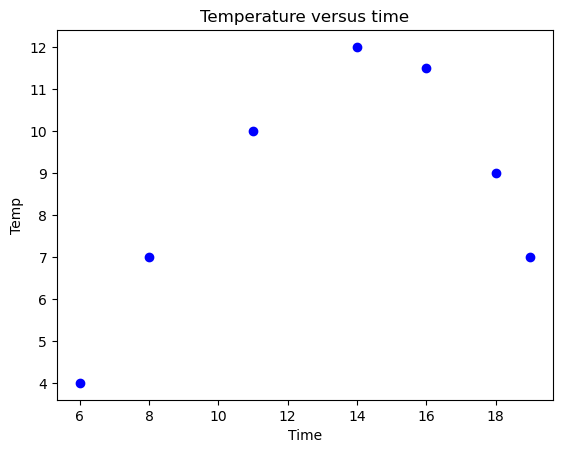

In [53]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(Time, Temp, 'bo')
plt.xlabel("Time")
plt.ylabel("Temp")
plt.title('Temperature versus time')
plt.show()

In [54]:
beta = np.polyfit(Time, Temp, 2)

In [55]:
beta

array([ -0.14080043,   3.8206588 , -14.2562322 ])

In [56]:
p = np.poly1d(beta)

In [57]:
p

poly1d([ -0.14080043,   3.8206588 , -14.2562322 ])

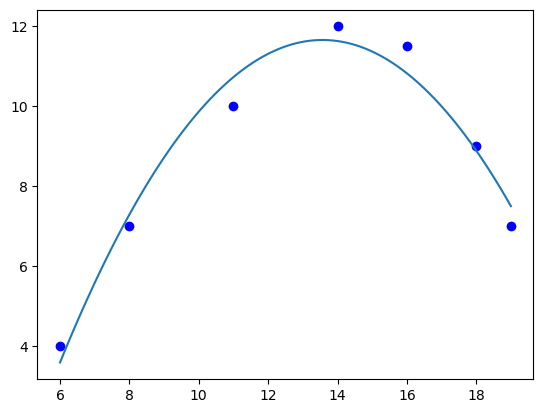

In [58]:
xp = np.linspace(6, 19, 100)
plt.figure()
plt.plot(Time, Temp, 'bo', xp, p(xp), '-')
plt.show()

In [59]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [60]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [61]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [62]:
X,y = shuffle(data, target, random_state=7)

In [63]:
X.shape

(506, 13)

In [64]:
y.shape

(506,)

In [65]:
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [66]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [67]:
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=400, random_state=7)

In [68]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)
print("#### Decision Tree performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82


In [69]:
y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab)
print("#### AdaBoost performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### AdaBoost performance ####
Mean squared error = 7.54
Explained variance score = 0.91


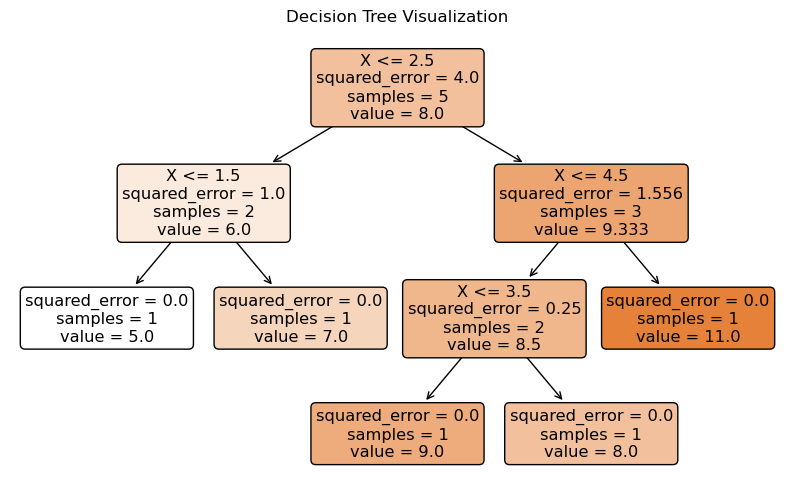

In [70]:
# Importing necessary libraries for visualization
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Creating a small sample dataset for simplicity
X_sample = [[1], [2], [3], [4], [5]]
y_sample = [5, 7, 9, 8, 11]

# Initializing and fitting a Decision Tree Regressor with limited depth
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_sample, y_sample)

# Visualizing the decision tree
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=["X"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [71]:
# Example predictions for specific input values
example_inputs = [[1.5], [4.0], [2.8]]  # Inputs for which we want to predict

# Predicting using the trained model
predictions = model.predict(example_inputs)

# Displaying the results
results_df = pd.DataFrame(example_inputs, columns=["X"])
results_df["Predicted Value"] = predictions

results_df

,X,Predicted Value
0,1.5,5.0
1,4.0,8.0
2,2.8,9.0


In [72]:
# Reorganizing the step-by-step implementation to ensure proper calculations and clarity

# Define the dataset again for clarity
data = {
    "Sample": ["x1", "x2", "x3", "x4"],
    "X": [1, 2, 3, 4],
    "y": [1, 1, -1, -1],  # True labels
    "w": [0.25, 0.25, 0.25, 0.25]  # Initial weights
}

df = pd.DataFrame(data)

# Step 1: Train the first weak learner
# Assume the weak learner predicts as follows:
df["h1"] = [1, 1, 1, -1]  # Weak learner predictions

# Step 2: Calculate the weak learner's error
df["Misclassified"] = df["h1"] != df["y"]
error_t1 = np.sum(df.loc[df["Misclassified"], "w"])

# Step 3: Compute the weight of the weak learner
alpha_t1 = 0.5 * np.log((1 - error_t1) / error_t1)

# Step 4: Update weights for the samples
df["w_t+1"] = df["w"] * np.exp(alpha_t1 * df["Misclassified"].replace({True: 1, False: -1}))

# Normalize weights so they sum to 1
df["w_t+1"] = df["w_t+1"] / df["w_t+1"].sum()

# Second iteration
# Assume the second weak learner predicts:
df["h2"] = [1, -1, -1, -1]  # Weak learner predictions in second iteration

# Calculate the weak learner's error
df["Misclassified_2"] = df["h2"] != df["y"]
error_t2 = np.sum(df.loc[df["Misclassified_2"], "w_t+1"])

# Compute the weight of the second weak learner
alpha_t2 = 0.5 * np.log((1 - error_t2) / error_t2)

# Update weights for samples in the second iteration
df["w_t+2"] = df["w_t+1"] * np.exp(alpha_t2 * df["Misclassified_2"].replace({True: 1, False: -1}))

# Normalize weights again
df["w_t+2"] = df["w_t+2"] / df["w_t+2"].sum()

df


,Sample,X,y,w,h1,Misclassified,w_t+1,h2,Misclassified_2,w_t+2
0,x1,1,1,0.25,1,False,0.166667,1,False,0.1
1,x2,2,1,0.25,1,False,0.166667,-1,True,0.5
2,x3,3,-1,0.25,1,True,0.500000,-1,False,0.3
3,x4,4,-1,0.25,-1,False,0.166667,-1,False,0.1


# AdaBoost: Adaptive Boosting

**AdaBoost (Adaptive Boosting)** is a popular ensemble learning algorithm that combines the predictions of multiple weak learners (typically decision trees) to create a strong predictive model. It is called **"adaptive"** because it adjusts the weights of incorrectly predicted samples, making the next weak learner focus more on these challenging cases.

---

## How AdaBoost Works

### 1. Initialize Weights
- Start with equal weights for all training samples.

### 2. Train Weak Learners
- Train a weak learner (e.g., a decision stump, which is a shallow decision tree with depth = 1) on the dataset.
- Evaluate its performance on the training data.

### 3. Adjust Weights
- **Increase the weights** of the misclassified samples, so the next weak learner focuses more on them.
- **Decrease the weights** of correctly classified samples.

### 4. Combine Weak Learners
- Assign a weight to each weak learner based on its accuracy. Learners with better accuracy get higher weights in the final model.
- Combine the predictions of all weak learners to make the final decision, typically by a weighted majority vote (for classification) or weighted sum (for regression).

### 5. Repeat
- Steps 2-4 are repeated for a specified number of iterations ($n\_estimators$) or until the model achieves a satisfactory level of performance.

---

## Key Features of AdaBoost
1. **Focuses on hard-to-classify samples** by giving them more weight in subsequent iterations.
2. **Combines weak models** into a single, strong model.
3. Works well with simple models like **decision stumps**.

---

## Advantages
1. **High Accuracy**: Can achieve high accuracy by combining weak learners.
2. **Versatility**: Works for both classification and regression problems.
3. **Simplicity**: Easy to implement and interpret.

---

## Disadvantages
1. **Sensitivity to Noisy Data**: Misclassified samples are given higher weights, so noisy data can mislead the algorithm.
2. **Computational Cost**: Training multiple learners can be time-consuming.
3. **Overfitting**: While it generally resists overfitting, it can still occur if the weak learners are too complex.

---

## Mathematical Intuition

### Weak Learner’s Error:
The error rate of the weak learner $h_t$ is given by:

$$
\epsilon_t = \frac{\sum_{i=1}^n w_i \cdot \mathbb{I}(h_t(x_i) \neq y_i)}{\sum_{i=1}^n w_i}
$$

Where:
- $\epsilon_t$: Error rate of the weak learner $h_t$.
- $w_i$: Weight of the $i$-th sample.
- $\mathbb{I}$: Indicator function, where $\mathbb{I}(\text{condition}) = 1$ if the condition is true, and 0 otherwise.

---

### Weight of Weak Learner:
The weight of the weak learner is calculated as:

$$
\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
$$

---

### Update Sample Weights:
The weights of the samples are updated as follows:

$$
w_i^{(t+1)} = w_i^{(t)} \cdot e^{\alpha_t \cdot \mathbb{I}(h_t(x_i) \neq y_i)}
$$

Where:
- $w_i^{(t+1)}$: Updated weight for the $i$-th sample.
- $w_i^{(t)}$: Previous weight for the $i$-th sample.
- $\alpha_t$: Weight of the weak learner.
- $\mathbb{I}(h_t(x_i) \neq y_i)$: Indicator function for misclassified samples.

---

## Final Prediction:
The final prediction is made by combining the predictions of all weak learners:

$$
H(x) = \text{sign}\left(\sum_{t=1}^T \alpha_t \cdot h_t(x)\right)
$$

Where:
- $H(x)$: Final strong classifier.
- $T$: Total number of weak learners.
- $\alpha_t$: Weight of the $t$-th weak learner.
- $h_t(x)$: Prediction of the $t$-th weak learner.

---

This Markdown can be directly pasted into a Jupyter Lab cell to render it properly with mathematical equations. Let me know if you need further assistance!


# AdaBoost: Step-by-Step Example

## Dataset
We’ll work with a binary classification dataset:

| **Sample ($i$)** | **$X$**   | **$y$ (Target)** | **Initial Weight ($w_i$)** |
|-------------------|-----------|------------------|----------------------------|
| $x_1$            | $+1$     | $+1$             | $0.25$                    |
| $x_2$            | $+1$     | $+1$             | $0.25$                    |
| $x_3$            | $-1$     | $-1$             | $0.25$                    |
| $x_4$            | $-1$     | $-1$             | $0.25$                    |

---

## Iteration 1

### 1. Initialize Weights
All samples start with equal weights:
$$
w_i = \frac{1}{N} = 0.25 \quad \text{(where $N = 4$)}.
$$

### 2. Train Weak Learner
Train a weak learner (e.g., decision stump). Assume the weak learner predicts:
$$
h_1(x) =
\begin{cases} 
+1, & \text{if } x \in \{x_1, x_2, x_3\} \\ 
-1, & \text{if } x = x_4
\end{cases}
$$

### 3. Calculate Error ($\epsilon_1$)
Compute the error rate of the weak learner:
$$
\epsilon_1 = \sum_{i=1}^N w_i \cdot \mathbb{I}(h_1(x_i) \neq y_i)
$$
- Misclassified samples: $x_3$ (true label: $-1$, predicted: $+1$).

Substituting weights:
$$
\epsilon_1 = w_3 = 0.25
$$

### 4. Compute Weight of Weak Learner ($\alpha_1$)
Calculate the weight of the weak learner:
$$
\alpha_1 = \frac{1}{2} \ln\left(\frac{1 - \epsilon_1}{\epsilon_1}\right)
$$
Substituting $\epsilon_1 = 0.25$:
$$
\alpha_1 = \frac{1}{2} \ln\left(\frac{1 - 0.25}{0.25}\right) = \frac{1}{2} \ln(3) \approx 0.55
$$

### 5. Update Sample Weights
Update weights of the samples:
$$
w_i^{(t+1)} = w_i^{(t)} \cdot e^{\alpha_t \cdot \mathbb{I}(h_t(x_i) \neq y_i)}
$$

- For correctly classified samples ($x_1, x_2, x_4$):
$$
w_i^{(t+1)} = w_i^{(t)} \cdot e^{-\alpha_1}
$$
- For misclassified samples ($x_3$):
$$
w_i^{(t+1)} = w_i^{(t)} \cdot e^{\alpha_1}
$$

Compute updated weights:
$$
w_1^{(2)} = w_2^{(2)} = w_4^{(2)} = 0.25 \cdot e^{-0.55} \approx 0.162
$$
$$
w_3^{(2)} = 0.25 \cdot e^{0.55} \approx 0.405
$$

Normalize weights so they sum to 1:
$$
w_i^{(2)} = \frac{w_i^{(2)}}{\sum_{j=1}^N w_j^{(2)}}
$$

After normalization:
$$
w_1 = 0.2, \, w_2 = 0.2, \, w_3 = 0.4, \, w_4 = 0.2
$$

---

## Iteration 2

### 1. Train Second Weak Learner
The second weak learner is trained using the updated weights. Assume it predicts:
$$
h_2(x) =
\begin{cases}
+1, & \text{if } x \in \{x_1, x_2\} \\ 
-1, & \text{if } x \in \{x_3, x_4\}
\end{cases}
$$

### 2. Calculate Error ($\epsilon_2$)
- Misclassified sample: $x_2$ (true label: $+1$, predicted: $-1$).
$$
\epsilon_2 = w_2 = 0.2
$$

### 3. Compute Weight of Weak Learner ($\alpha_2$)
Calculate:
$$
\alpha_2 = \frac{1}{2} \ln\left(\frac{1 - \epsilon_2}{\epsilon_2}\right)
$$
Substituting $\epsilon_2 = 0.2$:
$$
\alpha_2 = \frac{1}{2} \ln\left(\frac{1 - 0.2}{0.2}\right) = \frac{1}{2} \ln(4) = 0.69
$$

### 4. Update Weights
Update weights as before. Misclassified sample ($x_2$) will get a higher weight, while the others will decrease.

Final weights after normalization:
$$
w_1 = 0.15, \, w_2 = 0.45, \, w_3 = 0.3, \, w_4 = 0.1
$$

---

## Final Prediction
The final strong classifier combines the weak learners:
$$
H(x) = \text{sign}\left(\sum_{t=1}^T \alpha_t \cdot h_t(x)\right)
$$

For each sample, calculate:
$$
H(x) = \alpha_1 \cdot h_1(x) + \alpha_2 \cdot h_2(x)
$$

Take the sign of the result to get the final prediction.


In [75]:
# Defining the weak learners' predictions and their weights (alphas)
# Predictions of the weak learners for each sample
h1 = [1, 1, 1, -1]  # Predictions from the first weak learner
h2 = [1, -1, -1, -1]  # Predictions from the second weak learner

# Weights (alphas) of the weak learners
alpha1 = 0.55  # Weight of the first weak learner
alpha2 = 0.69  # Weight of the second weak learner

# Combine the weak learners' predictions
H_x = [alpha1 * h1[i] + alpha2 * h2[i] for i in range(len(h1))]

# Final predictions by taking the sign of H(x)
final_predictions = [1 if hx > 0 else -1 for hx in H_x]

# Create a DataFrame to display the results
final_results_df = pd.DataFrame({
    "Sample": ["x1", "x2", "x3", "x4"],
    "h1(x)": h1,
    "h2(x)": h2,
    "H(x)": H_x,
    "Final Prediction": final_predictions
})

final_results_df


,Sample,h1(x),h2(x),H(x),Final Prediction
0,x1,1,1,1.24,1
1,x2,1,-1,-0.14,-1
2,x3,1,-1,-0.14,-1
3,x4,-1,-1,-1.24,-1


# AdaBoost Performance Evaluation

## Results: Final Predictions

| **Sample** | **True Label ($y$)** | **Final Prediction** |
|------------|-----------------------|-----------------------|
| $x_1$      | $+1$                 | $+1$                 |
| $x_2$      | $+1$                 | $-1$                 |
| $x_3$      | $-1$                 | $-1$                 |
| $x_4$      | $-1$                 | $-1$                 |

---

## Comparison:

1. **$x_1$**: Correct prediction ($+1$ matches the true label $+1$).
2. **$x_2$**: Incorrect prediction ($-1$ does not match the true label $+1$).
3. **$x_3$**: Correct prediction ($-1$ matches the true label $-1$).
4. **$x_4$**: Correct prediction ($-1$ matches the true label $-1$).

---

## Performance:

- **Number of Correct Predictions**: $3$
- **Total Samples**: $4$

### Accuracy:
$$
\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Samples}} = \frac{3}{4} = 0.75 \, (75\%)
$$

---

## Conclusion:

- The **AdaBoost model** correctly predicts $3$ out of $4$ samples, achieving an accuracy of **$75\%$**.
- The misclassification of **$x_2$** is because the combined weak learners did not assign enough weight to correct its classification.


In [77]:
DTFImp = dt_regressor.feature_importances_
DTFImp = 100 * (DTFImp / max(DTFImp))
index_sorted = np.flipud(np.argsort(DTFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

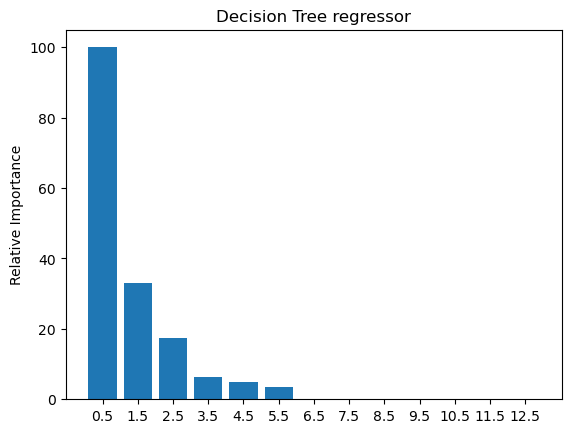

In [78]:
plt.figure()
plt.bar(pos, DTFImp[index_sorted], align='center')
plt.xticks(pos)
plt.ylabel('Relative Importance')
plt.title("Decision Tree regressor")
plt.show()

In [79]:
ABFImp= ab_regressor.feature_importances_ 
ABFImp= 100.0 * (ABFImp / max(ABFImp))
index_sorted = np.flipud(np.argsort(ABFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

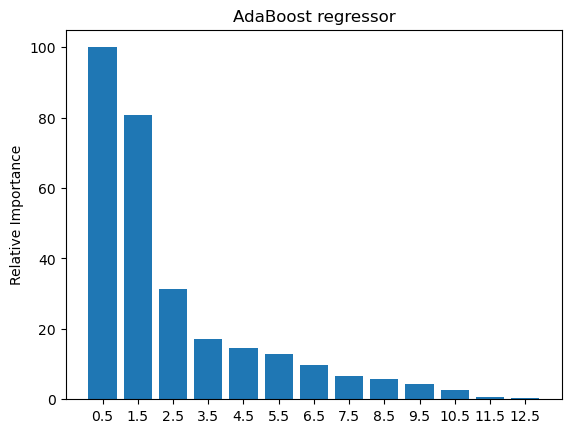

In [80]:
plt.figure()
plt.bar(pos, ABFImp[index_sorted], align='center')
plt.xticks(pos)
plt.ylabel('Relative Importance')
plt.title("AdaBoost regressor")
plt.show()

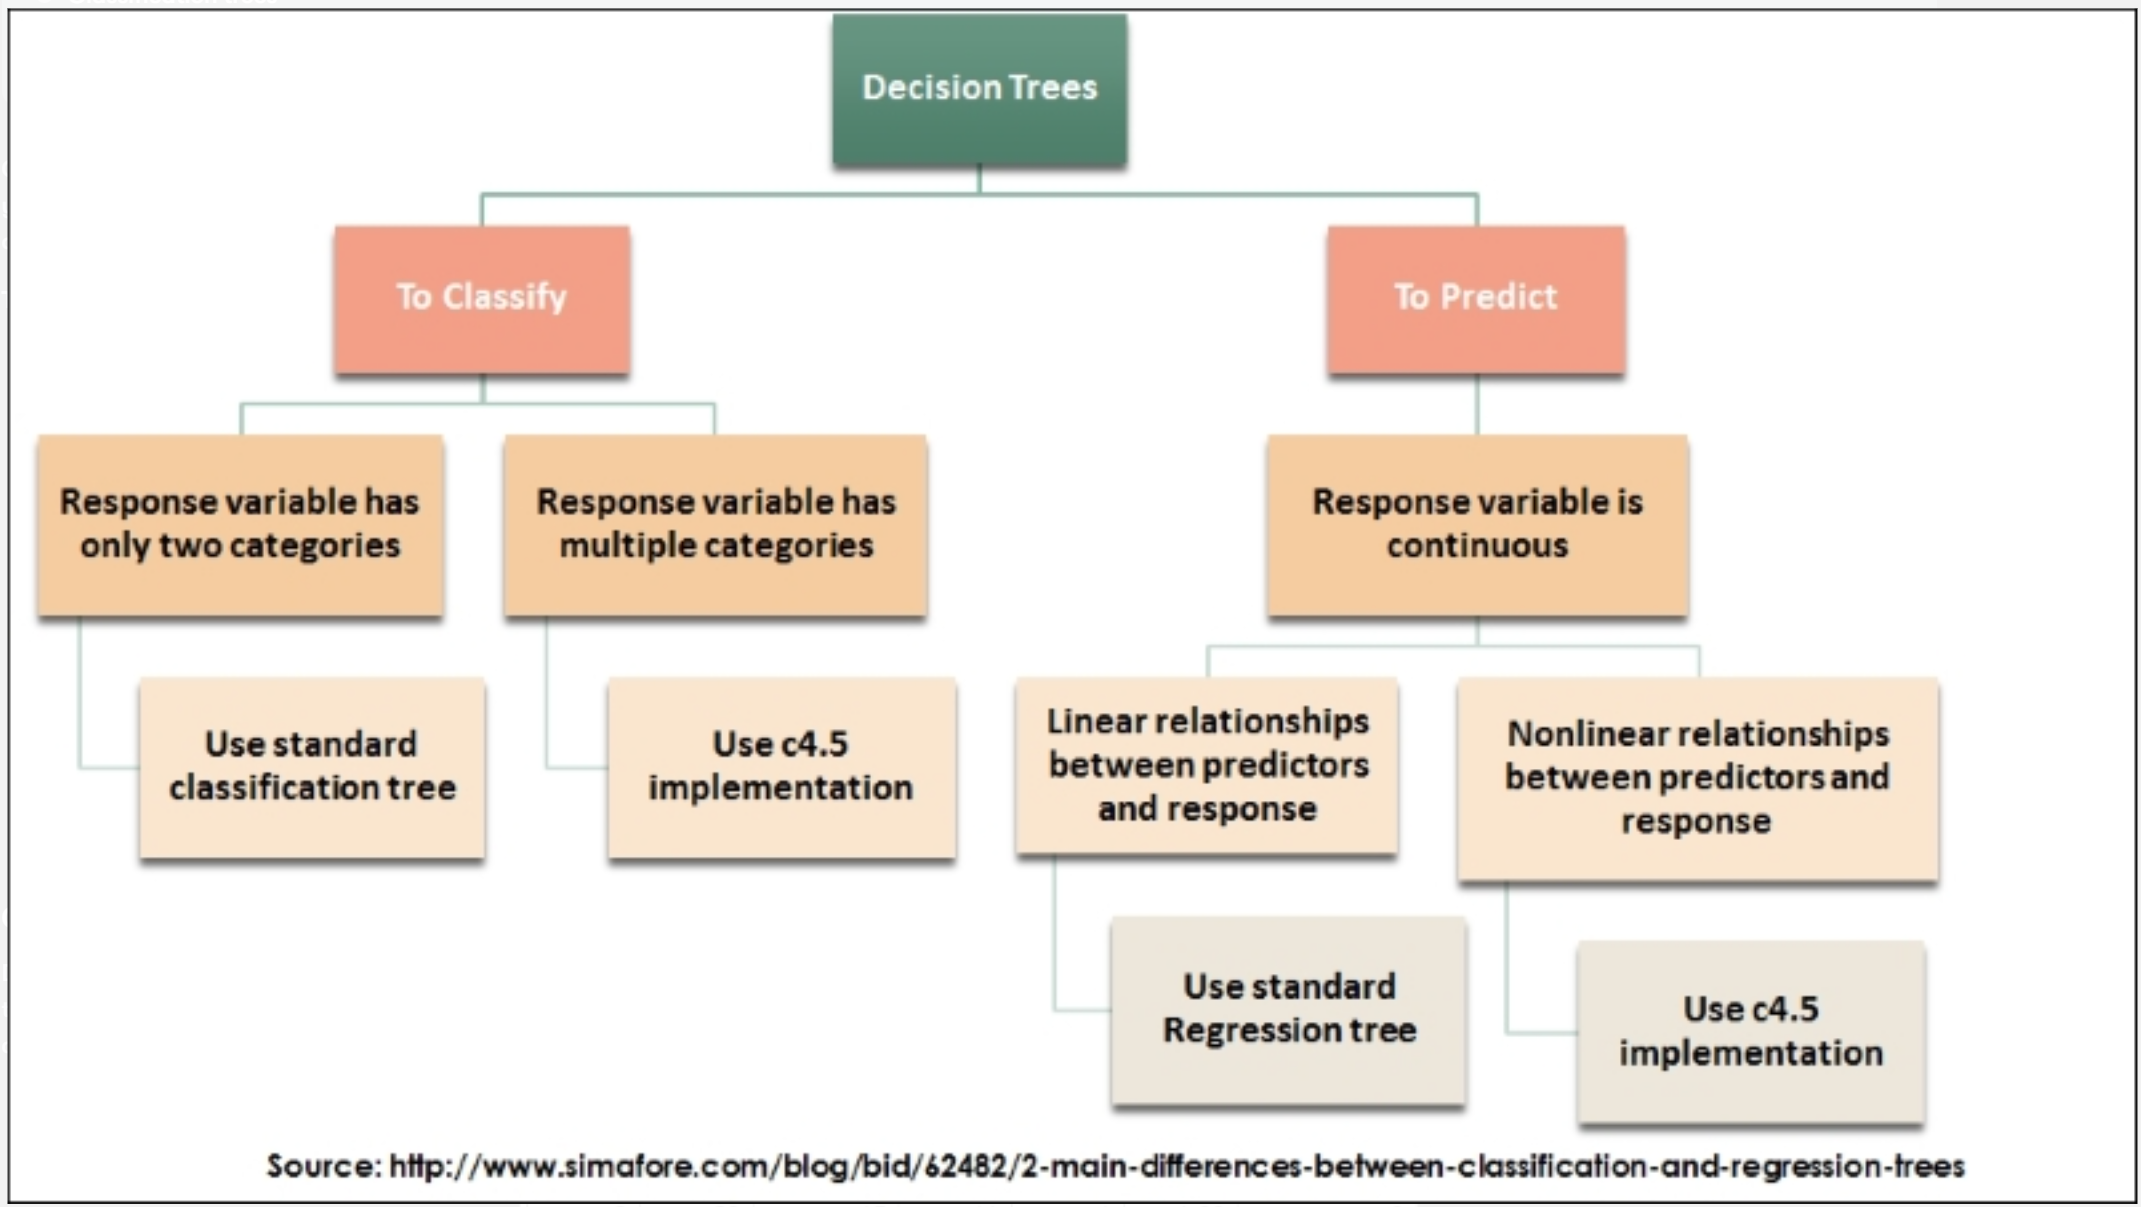

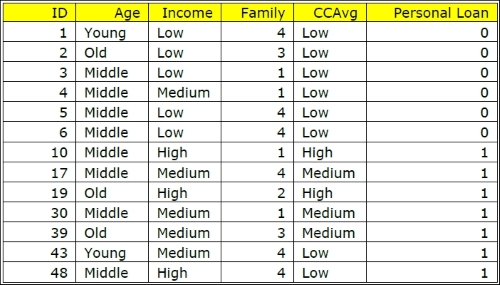

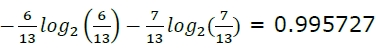

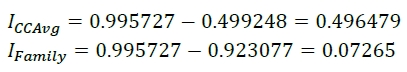

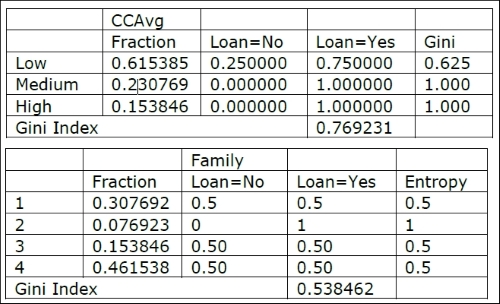

# Entropy and Gini Index Calculation

This document walks through the calculation of Entropy and Gini Index for the attributes **CCAvg** and **Family**, comparing the results and concluding which attribute should be chosen for splitting the dataset.

---

## **1. Entropy Calculation**

### **Entropy Formula**
The formula for entropy is:
$$
H = -\sum_{i} P_i \log_2(P_i)
$$
Where:
- $$P_i$$ is the probability of each class (e.g., Loan=Yes or Loan=No).

---

### **1.1 Overall Entropy Before Splitting**

From the dataset:
- Total samples: $$13$$
- $$Loan=Yes = 6$$, $$Loan=No = 7$$

$$
P(\text{Loan=Yes}) = \frac{6}{13}, \, P(\text{Loan=No}) = \frac{7}{13}
$$

Substitute into the formula:
$$
H_{\text{before}} = -\left(\frac{6}{13} \log_2\left(\frac{6}{13}\right) + \frac{7}{13} \log_2\left(\frac{7}{13}\right)\right)
$$
$$
H_{\text{before}} \approx 0.995727
$$

---

### **1.2 Weighted Entropy for `CCAvg`**

| **CCAvg** | **Fraction** | **Loan=No** | **Loan=Yes** | **Entropy** |
|-----------|--------------|--------------|--------------|-------------|
| **Low**   | $$0.615385$$ | $$0.25$$     | $$0.75$$     | $$0.811$$   |
| **Medium**| $$0.230769$$ | $$0.00$$     | $$1.00$$     | $$0.000$$   |
| **High**  | $$0.153846$$ | $$0.00$$     | $$1.00$$     | $$0.000$$   |

#### Weighted Entropy:
$$
H_{\text{CCAvg}} = (0.615385 \cdot 0.811) + (0.230769 \cdot 0.000) + (0.153846 \cdot 0.000)
$$
$$
H_{\text{CCAvg}} = 0.498
$$

#### Information Gain for `CCAvg`:
$$
\text{Information Gain}_{\text{CCAvg}} = H_{\text{before}} - H_{\text{CCAvg}}
$$
$$
\text{Information Gain}_{\text{CCAvg}} = 0.995727 - 0.498 = 0.497535
$$

---

### **1.3 Weighted Entropy for `Family`**

| **Family** | **Fraction** | **Loan=No** | **Loan=Yes** | **Entropy** |
|------------|--------------|--------------|--------------|-------------|
| **1**      | $$0.307692$$ | $$0.50$$     | $$0.50$$     | $$1.000$$   |
| **2**      | $$0.076923$$ | $$0.00$$     | $$1.00$$     | $$0.000$$   |
| **3**      | $$0.153846$$ | $$0.50$$     | $$0.50$$     | $$1.000$$   |
| **4**      | $$0.461538$$ | $$0.50$$     | $$0.50$$     | $$1.000$$   |

#### Weighted Entropy:
$$
H_{\text{Family}} = (0.307692 \cdot 1.000) + (0.076923 \cdot 0.000) + (0.153846 \cdot 1.000) + (0.461538 \cdot 1.000)
$$
$$
H_{\text{Family}} = 0.923
$$

#### Information Gain for `Family`:
$$
\text{Information Gain}_{\text{Family}} = H_{\text{before}} - H_{\text{Family}}
$$
$$
\text{Information Gain}_{\text{Family}} = 0.995727 - 0.923 = 0.072651
$$

---

## **2. Gini Index Calculation**

### **Gini Index Formula**
The formula for Gini Index is:
$$
\text{Gini} = 1 - \sum_{i} P_i^2
$$

For weighted Gini Index:
$$
\text{Weighted Gini Index} = \sum_{j} \left(\text{Weight of Branch}_j \cdot \text{Gini of Branch}_j\right)
$$

---

### **2.1 Weighted Gini Index for `CCAvg`**

| **CCAvg** | **Fraction** | **Loan=No** | **Loan=Yes** | **Gini** |
|-----------|--------------|--------------|--------------|----------|
| **Low**   | $$0.615385$$ | $$0.25$$     | $$0.75$$     | $$0.625$$ |
| **Medium**| $$0.230769$$ | $$0.00$$     | $$1.00$$     | $$0.000$$ |
| **High**  | $$0.153846$$ | $$0.00$$     | $$1.00$$     | $$0.000$$ |

#### Weighted Gini Index:
$$
\text{Gini}_{\text{CCAvg}} = (0.615385 \cdot 0.625) + (0.230769 \cdot 0.000) + (0.153846 \cdot 0.000)
$$
$$
\text{Gini}_{\text{CCAvg}} = 0.384615
$$

---

### **2.2 Weighted Gini Index for `Family`**

| **Family** | **Fraction** | **Loan=No** | **Loan=Yes** | **Gini** |
|------------|--------------|--------------|--------------|----------|
| **1**      | $$0.307692$$ | $$0.50$$     | $$0.50$$     | $$0.500$$ |
| **2**      | $$0.076923$$ | $$0.00$$     | $$1.00$$     | $$0.000$$ |
| **3**      | $$0.153846$$ | $$0.50$$     | $$0.50$$     | $$0.500$$ |
| **4**      | $$0.461538$$ | $$0.50$$     | $$0.50$$     | $$0.500$$ |

#### Weighted Gini Index:
$$
\text{Gini}_{\text{Family}} = (0.307692 \cdot 0.500) + (0.076923 \cdot 0.000) + (0.153846 \cdot 0.500) + (0.461538 \cdot 0.500)
$$
$$
\text{Gini}_{\text{Family}} = 0.461538
$$

---

## **3. Comparison**

| **Attribute** | **Weighted Entropy** | **Information Gain** | **Weighted Gini Index** |
|---------------|-----------------------|----------------------|--------------------------|
| **CCAvg**     | $$0.498$$            | $$0.497535$$         | $$0.384615$$            |
| **Family**    | $$0.923$$            | $$0.072651$$         | $$0.461538$$            |

---

## **4. Conclusion**

1. **Entropy-Based Decision**:
   - **`CCAvg`** has a higher **Information Gain** ($$0.497535$$) compared to `Family` ($$0.072651$$).
   - Thus, **`CCAvg`** is the better attribute for splitting.

2. **Gini-Based Decision**:
   - **`CCAvg`** has a lower Gini Index ($$0.384615$$) compared to `Family` ($$0.461538$$).
   - Thus, **`CCAvg`** is also the better attribute for splitting using Gini.

**Final Decision**: Based on both **Information Gain** and **Gini Index**, **`CCAvg`** is the better attribute for splitting the dataset.

---


# Gain Ratio Calculation for `CCAvg` and `Family`

---

## **1. Definitions**

### **1.1 Gain Ratio Formula**
The formula for Gain Ratio is:
$$
\text{Gain Ratio} = \frac{\text{Information Gain}}{\text{Information Content}}
$$

Where:
- **Information Gain (IG)**:
$$
\text{IG} = H_{\text{before}} - H_{\text{after}}
$$
- **Information Content (Split Info)**:
$$
\text{IC} = -\sum_{i} \left(\frac{\text{Samples in Branch}_i}{\text{Total Samples}}\right) \log_2\left(\frac{\text{Samples in Branch}_i}{\text{Total Samples}}\right)
$$

---

## **2. Dataset Splits**

### **2.1 For `CCAvg`**
- **Total Samples**: 13
- **Splits**:
  - **Low**: 8 samples ($P = \frac{8}{13} = 0.615385$)
  - **Medium**: 3 samples ($P = \frac{3}{13} = 0.230769$)
  - **High**: 2 samples ($P = \frac{2}{13} = 0.153846$)

### **2.2 For `Family`**
- **Total Samples**: 13
- **Splits**:
  - **Family=1**: 4 samples ($P = \frac{4}{13} = 0.307692$)
  - **Family=2**: 1 sample ($P = \frac{1}{13} = 0.076923$)
  - **Family=3**: 2 samples ($P = \frac{2}{13} = 0.153846$)
  - **Family=4**: 6 samples ($P = \frac{6}{13} = 0.461538$)

---

## **3. Calculations**

### **3.1 Information Gain**

#### **For `CCAvg`**:
From earlier calculations:
- $H_{\text{before}} = 0.995727$
- $H_{\text{CCAvg}} = 0.498$

$$
\text{Information Gain}_{\text{CCAvg}} = H_{\text{before}} - H_{\text{after}}
$$
$$
\text{Information Gain}_{\text{CCAvg}} = 0.995727 - 0.498 = 0.497727
$$

#### **For `Family`**:
From earlier calculations:
- $H_{\text{before}} = 0.995727$
- $H_{\text{Family}} = 0.923$

$$
\text{Information Gain}_{\text{Family}} = H_{\text{before}} - H_{\text{after}}
$$
$$
\text{Information Gain}_{\text{Family}} = 0.995727 - 0.923 = 0.072727
$$

---

### **3.2 Information Content**

#### **For `CCAvg`**:
$$
\text{IC}_{\text{CCAvg}} = -\left(0.615385 \log_2(0.615385) + 0.230769 \log_2(0.230769) + 0.153846 \log_2(0.153846)\right)
$$

Calculate each term:
- $0.615385 \log_2(0.615385) \approx -0.4249$
- $0.230769 \log_2(0.230769) \approx -0.4897$
- $0.153846 \log_2(0.153846) \approx -0.4141$

Sum:
$$
\text{IC}_{\text{CCAvg}} = -(-0.4249 - 0.4897 - 0.4141) \approx 1.3287
$$

#### **For `Family`**:
$$
\text{IC}_{\text{Family}} = -\left(0.307692 \log_2(0.307692) + 0.076923 \log_2(0.076923) + 0.153846 \log_2(0.153846) + 0.461538 \log_2(0.461538)\right)
$$

Calculate each term:
- $0.307692 \log_2(0.307692) \approx -0.5232$
- $0.076923 \log_2(0.076923) \approx -0.2843$
- $0.153846 \log_2(0.153846) \approx -0.4141$
- $0.461538 \log_2(0.461538) \approx -0.5229$

Sum:
$$
\text{IC}_{\text{Family}} = -(-0.5232 - 0.2843 - 0.4141 - 0.5229) \approx 1.7445
$$

---

### **3.3 Gain Ratio**

#### **For `CCAvg`**:
$$
\text{Gain Ratio}_{\text{CCAvg}} = \frac{\text{Information Gain}_{\text{CCAvg}}}{\text{IC}_{\text{CCAvg}}}
$$
$$
\text{Gain Ratio}_{\text{CCAvg}} = \frac{0.497727}{1.3287} \approx 0.3744
$$

#### **For `Family`**:
$$
\text{Gain Ratio}_{\text{Family}} = \frac{\text{Information Gain}_{\text{Family}}}{\text{IC}_{\text{Family}}}
$$
$$
\text{Gain Ratio}_{\text{Family}} = \frac{0.072727}{1.7445} \approx 0.0417
$$

---

## **4. Results and Comparison**

| **Attribute** | **Information Gain** | **Information Content** | **Gain Ratio** |
|---------------|-----------------------|--------------------------|----------------|
| **CCAvg**     | $0.497727$           | $1.3287$                | $0.3744$       |
| **Family**    | $0.072727$           | $1.7445$                | $0.0417$       |

---

## **5. Conclusion**

1. **`CCAvg`** has a significantly higher **Gain Ratio** ($0.3744$) compared to `Family` ($0.0417$).
2. This indicates that **`CCAvg`** is a better attribute for splitting the dataset.
3. The decision tree should prioritize splitting on **`CCAvg`** over `Family`.

---


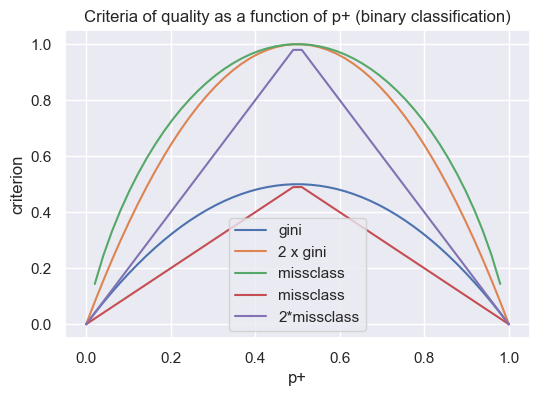

In [85]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

plt.figure(figsize=(6,4))
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label="gini")
plt.plot(xx, [4 * x * (1-x) for x in xx], label="2 x gini")
plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1-x) for x in xx], label="missclass")
plt.plot(xx, [1 - max(x, 1 - x) for x in xx], label="missclass")
plt.plot(xx, [2 - 2 * max(x, 1 - x) for x in xx], label="2*missclass")
plt.xlabel("p+")
plt.ylabel("criterion")
plt.title("Criteria of quality as a function of p+ (binary classification)")
plt.legend();

In [86]:
# first class 
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

In [87]:
#second clss
train_data = np.r_[train_data, np.random.normal(size=(100,2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

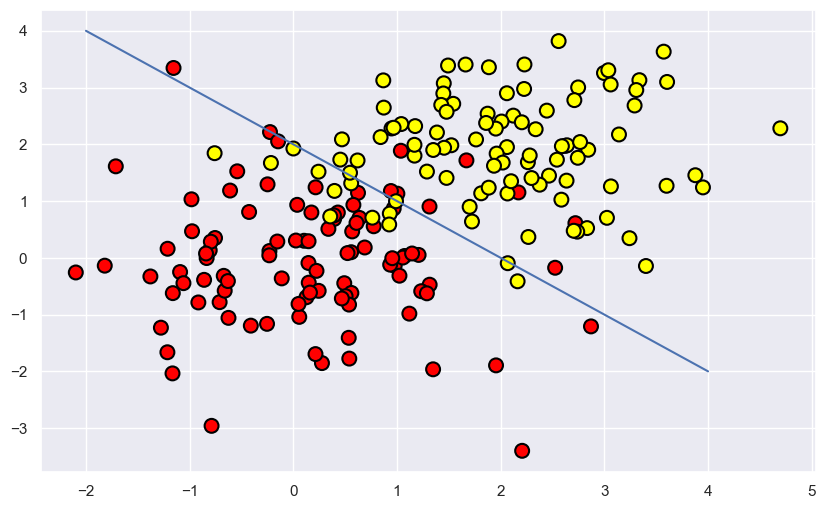

In [88]:
plt.figure(figsize=(10,6))
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolor="black",
    linewidth=1.5)
plt.plot(range(-2,5), range(4,-3, -1))

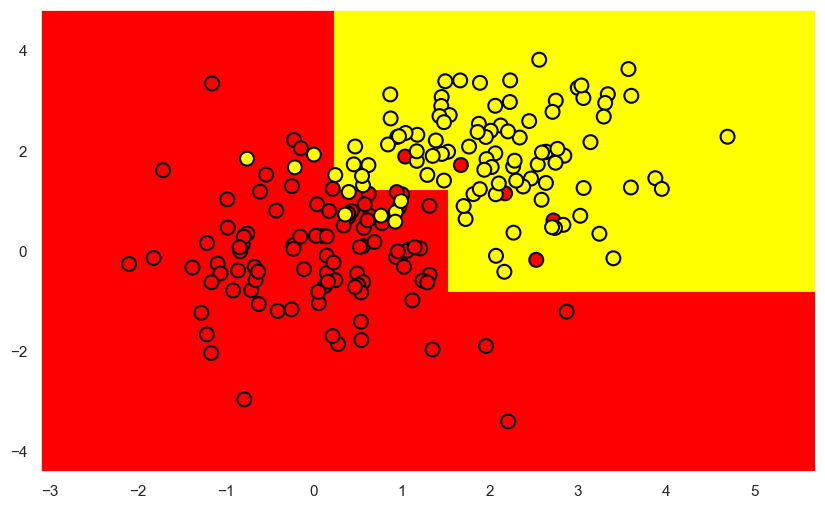

In [89]:
from sklearn.tree import DecisionTreeClassifier


# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

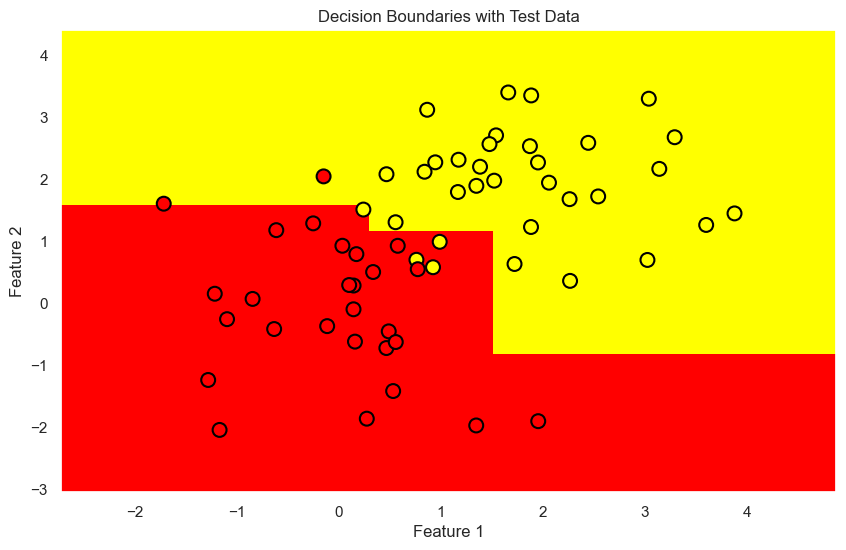

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate dataset
np.random.seed(17)
data = np.r_[np.random.normal(size=(100, 2)), np.random.normal(size=(100, 2), loc=2)]
labels = np.r_[np.zeros(100), np.ones(100)]

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=17)

# Auxiliary function to create a grid
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Train decision tree
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)
clf_tree.fit(train_data, train_labels)

# Create a grid for the feature space (based on test data)
xx, yy = get_grid(test_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Visualize decision boundaries and test data
plt.figure(figsize=(10, 6))

# Plot decision boundaries
plt.pcolormesh(xx, yy, predicted, cmap="autumn", shading="auto")

# Plot test data points
plt.scatter(
    test_data[:, 0],
    test_data[:, 1],
    c=test_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)

plt.title("Decision Boundaries with Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


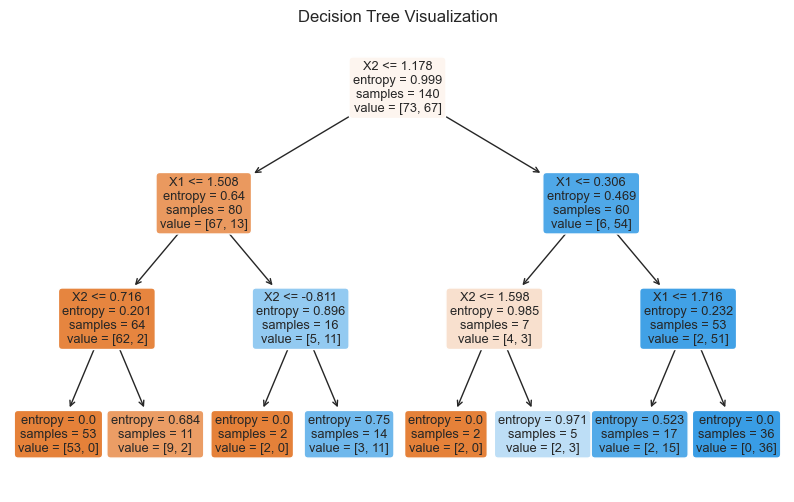

In [91]:

# Visualizing the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf_tree, feature_names=["X1","X2"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

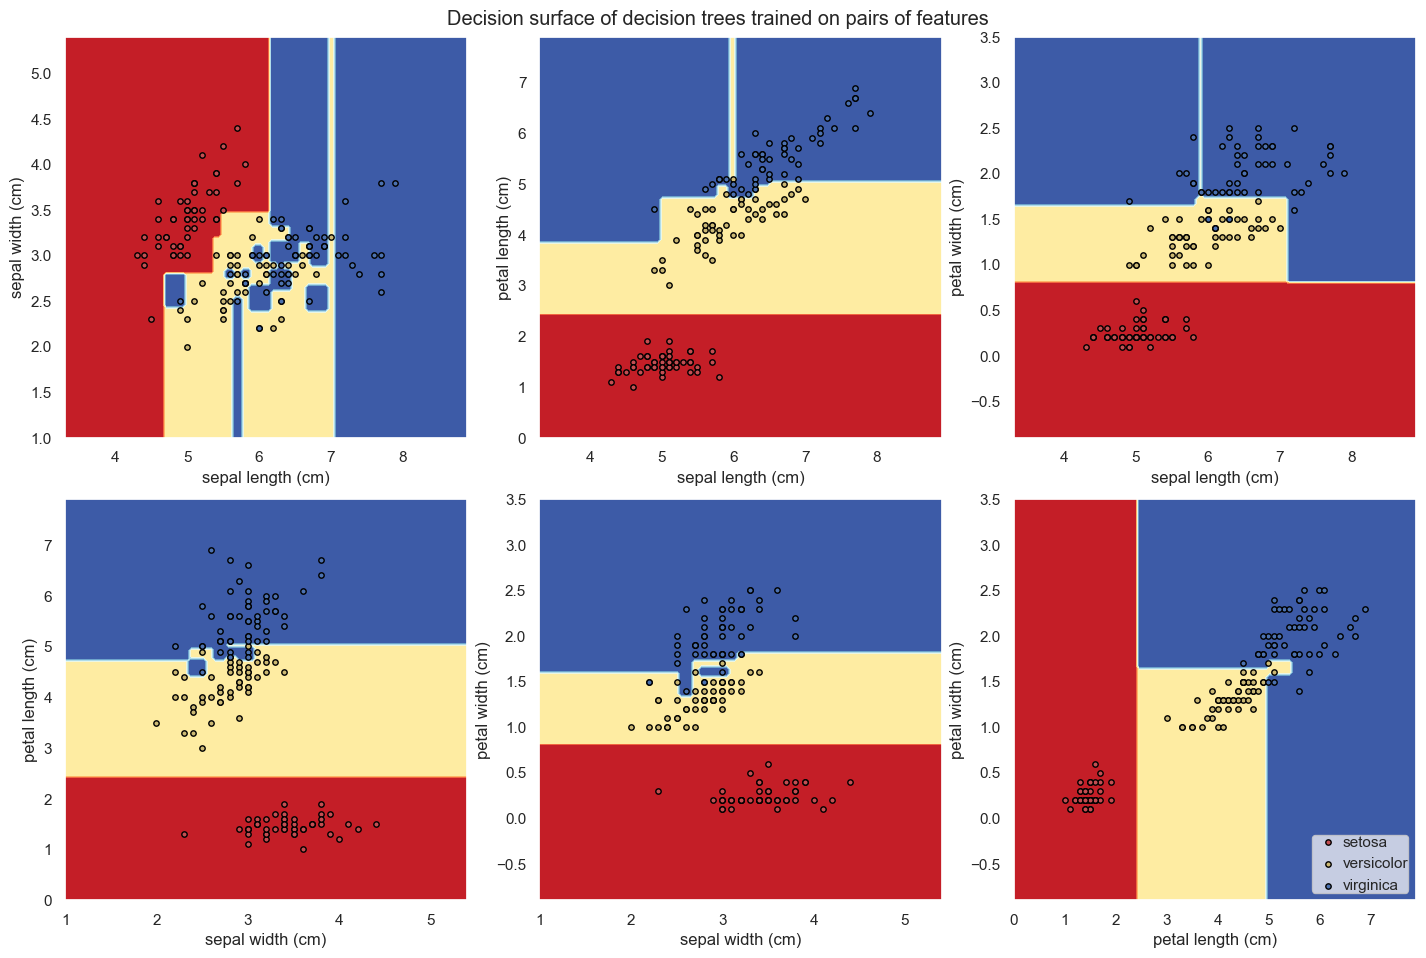

In [92]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

iris = load_iris()

# Create a figure with a larger size
plt.figure(figsize=(15, 10))  # Adjust the figure size (width, height)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

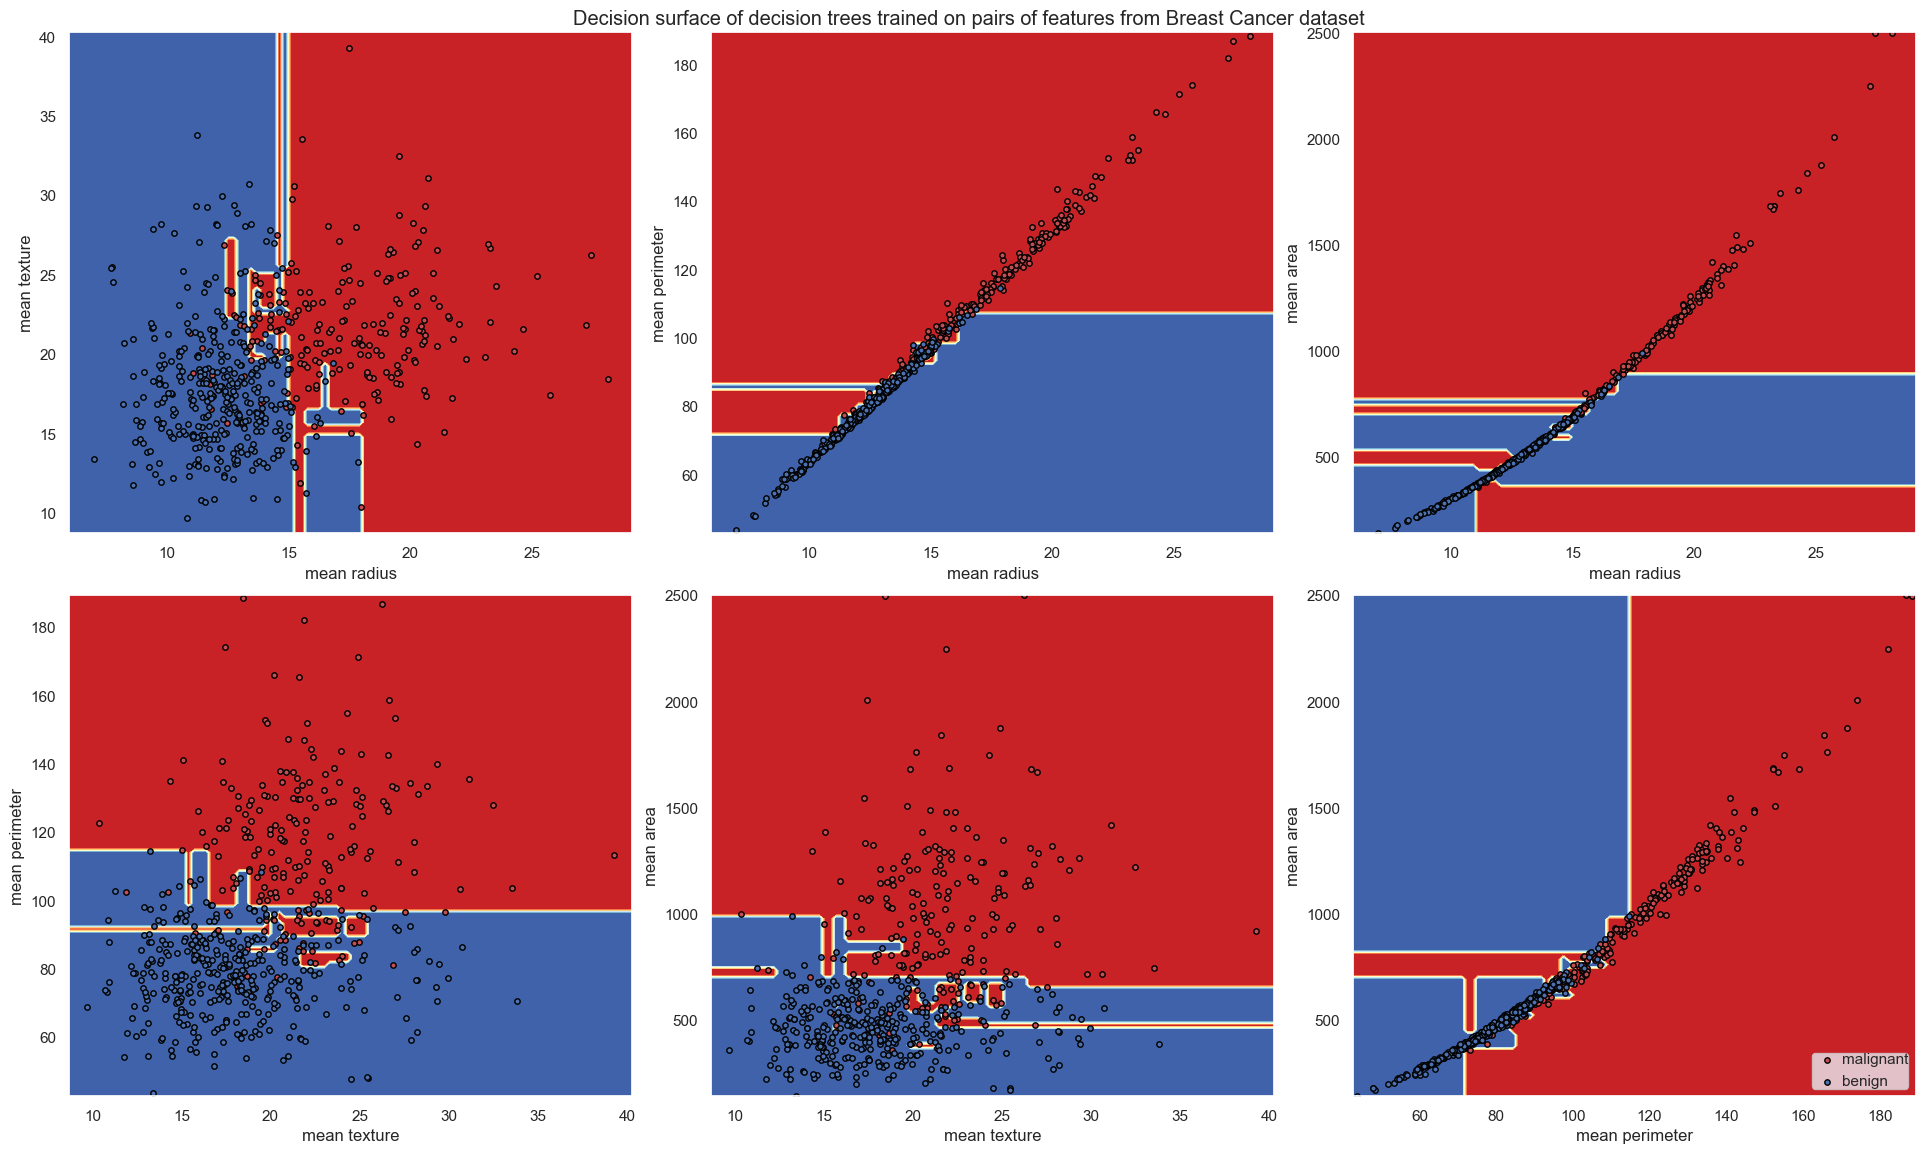

In [285]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 2  # Binary classification (malignant and benign)
plot_colors = "rb"  # Two classes (red, blue)
plot_step = 0.02  # Step size for the meshgrid

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

# Create a figure with a larger size
plt.figure(figsize=(20, 12))  # Adjust the figure size (width, height)

# Use 6 combinations of 2 features out of all available features
# We can select a subset of important features
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

for pairidx, pair in enumerate(feature_pairs):
    # We only take the two corresponding features
    X = breast_cancer.data[:, pair]
    y = breast_cancer.target

    # Train a Decision Tree on the two selected features
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=breast_cancer.feature_names[pair[0]],
        ylabel=breast_cancer.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=breast_cancer.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features from Breast Cancer dataset")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")


In [287]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

# Load the Breast Cancer dataset
X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Get feature importance
feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(importance_df)


                    Feature  Importance
20             worst radius    0.695594
27     worst concave points    0.107097
21            worst texture    0.088561
15        compactness error    0.031841
7       mean concave points    0.014410
23               worst area    0.011086
26          worst concavity    0.008280
13               area error    0.007877
24         worst smoothness    0.007388
10             radius error    0.007316
4           mean smoothness    0.007017
25        worst compactness    0.006892
2            mean perimeter    0.005639
14         smoothness error    0.001004
18           symmetry error    0.000000
22          worst perimeter    0.000000
28           worst symmetry    0.000000
19  fractal dimension error    0.000000
0               mean radius    0.000000
17     concave points error    0.000000
16          concavity error    0.000000
1              mean texture    0.000000
12          perimeter error    0.000000
11            texture error    0.000000


In [289]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names

# Train Decision Tree Classifier with RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=5)  # Select the top 5 features
rfe.fit(X, y)

# Get the ranking of features
rfe_ranking = pd.DataFrame({'Feature': feature_names, 'Ranking': rfe.ranking_})
rfe_ranking = rfe_ranking.sort_values(by='Ranking')

# Display the top-ranked features
print(rfe_ranking)


                    Feature  Ranking
21            worst texture        1
27     worst concave points        1
24         worst smoothness        1
23               worst area        1
20             worst radius        1
13               area error        2
7       mean concave points        3
26          worst concavity        4
25        worst compactness        5
14         smoothness error        6
22          worst perimeter        7
12          perimeter error        8
18           symmetry error        9
10             radius error       10
11            texture error       11
9    mean fractal dimension       12
28           worst symmetry       13
29  worst fractal dimension       14
8             mean symmetry       15
19  fractal dimension error       16
6            mean concavity       17
5          mean compactness       18
4           mean smoothness       19
16          concavity error       20
17     concave points error       21
3                 mean area       22
2

In [291]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names

# Calculate mutual information between features and target
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame for visualization
mutual_info_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Display the most important features
print(mutual_info_df)


                    Feature  Mutual Information
22          worst perimeter            0.474290
23               worst area            0.463259
20             worst radius            0.455517
7       mean concave points            0.439085
27     worst concave points            0.435288
2            mean perimeter            0.403130
6            mean concavity            0.374418
0               mean radius            0.367184
3                 mean area            0.359646
13               area error            0.339981
26          worst concavity            0.316431
12          perimeter error            0.274177
10             radius error            0.251016
25        worst compactness            0.225649
5          mean compactness            0.210964
17     concave points error            0.125020
21            worst texture            0.121564
16          concavity error            0.117939
24         worst smoothness            0.103518
1              mean texture            0

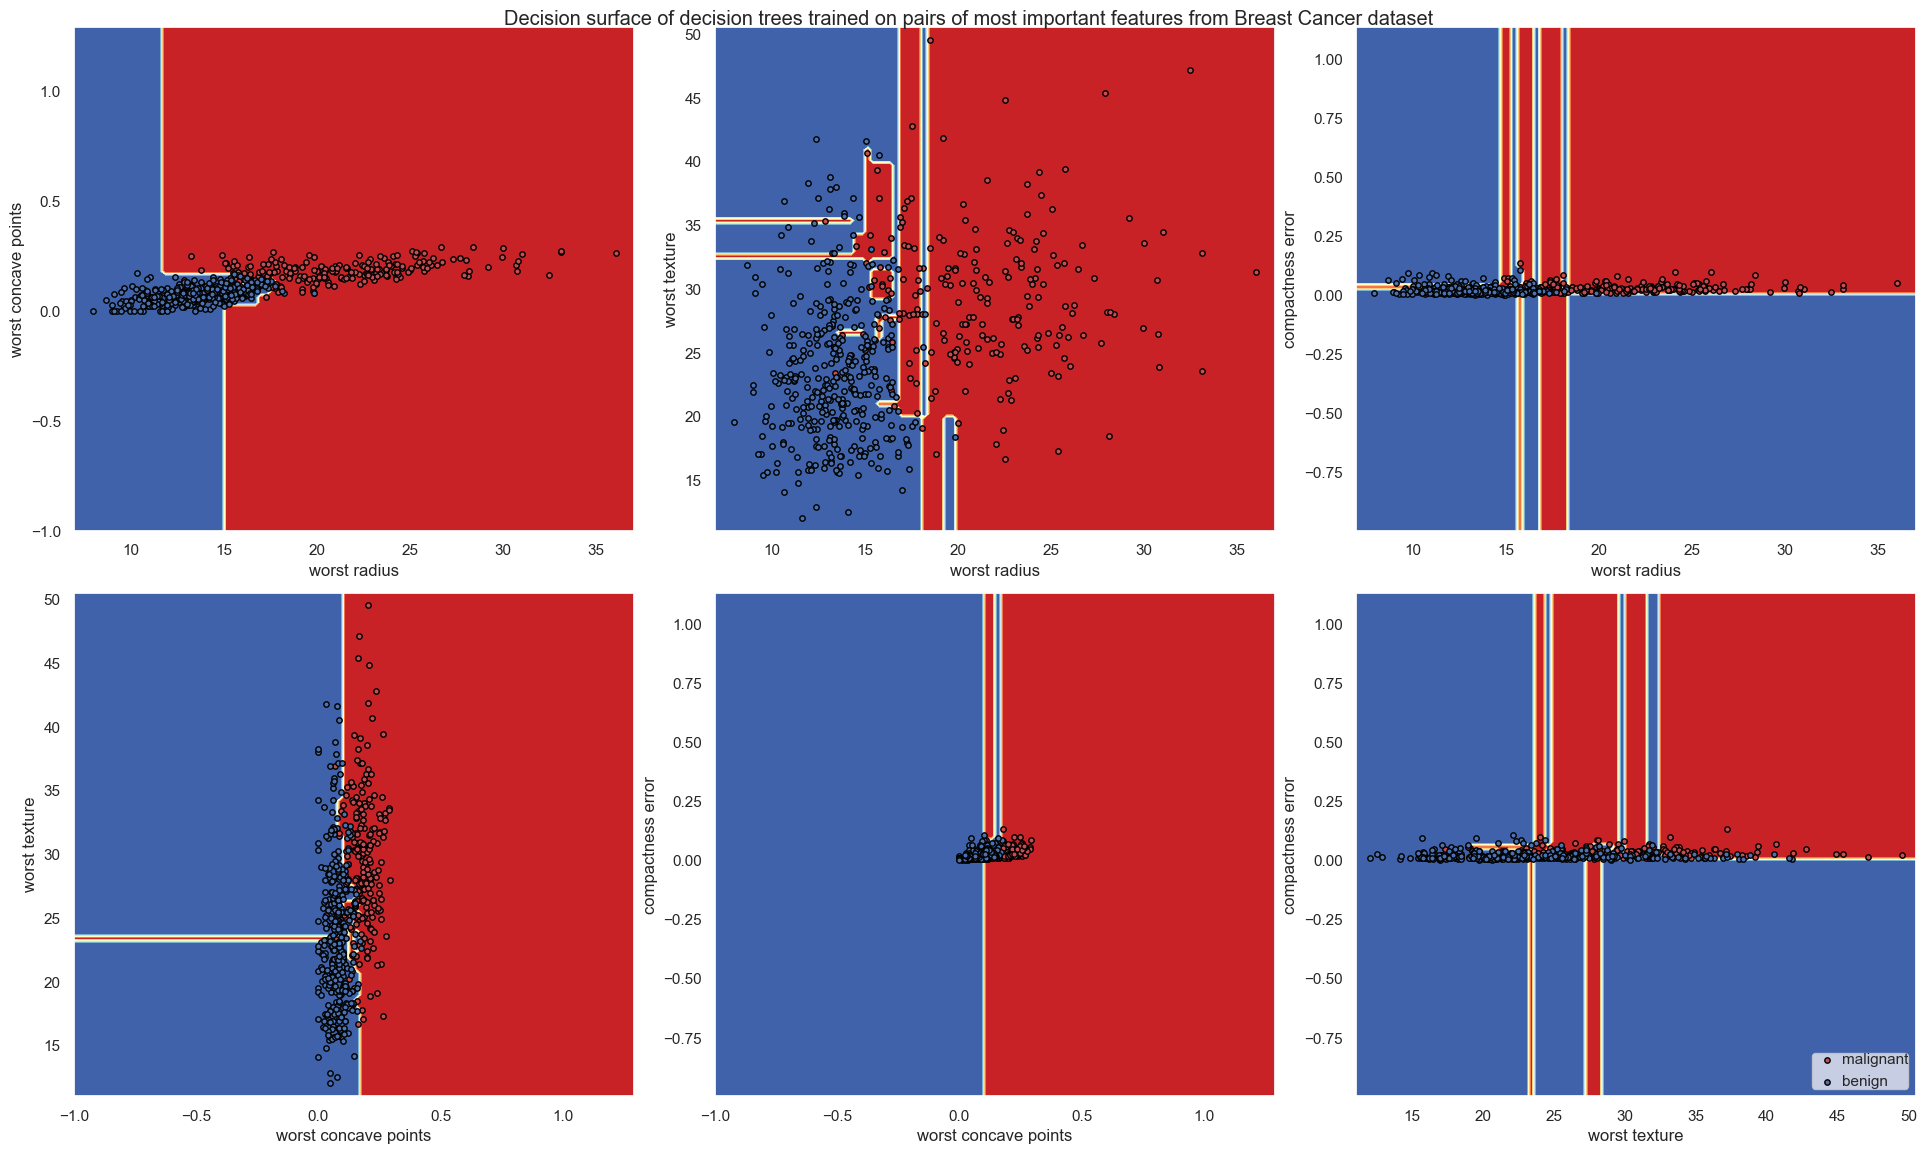

In [293]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 2  # Binary classification (malignant and benign)
plot_colors = "rb"  # Two classes (red, blue)
plot_step = 0.02  # Step size for the meshgrid

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# **Step 1**: Train a Decision Tree to calculate feature importance
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# **Step 2**: Select the top 4 most important features
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': breast_cancer.feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_features = importance_df['Feature'].head(4).values

# **Step 3**: Get the indices of the top features from the original dataset
top_feature_indices = [list(breast_cancer.feature_names).index(f) for f in top_features]

# **Step 4**: Generate pairs of the 4 most important features
feature_pairs = [[top_feature_indices[0], top_feature_indices[1]], 
                 [top_feature_indices[0], top_feature_indices[2]], 
                 [top_feature_indices[0], top_feature_indices[3]], 
                 [top_feature_indices[1], top_feature_indices[2]], 
                 [top_feature_indices[1], top_feature_indices[3]], 
                 [top_feature_indices[2], top_feature_indices[3]]]

# **Step 5**: Plot the decision boundaries
plt.figure(figsize=(20, 12))  # Adjust the figure size (width, height)

for pairidx, pair in enumerate(feature_pairs):
    # We only take the two corresponding features
    X_pair = breast_cancer.data[:, pair]

    # Train a Decision Tree on the two selected features
    clf = DecisionTreeClassifier().fit(X_pair, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_pair,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=breast_cancer.feature_names[pair[0]],
        ylabel=breast_cancer.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X_pair[idx, 0],
            X_pair[idx, 1],
            c=color,
            label=breast_cancer.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of most important features from Breast Cancer dataset")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")


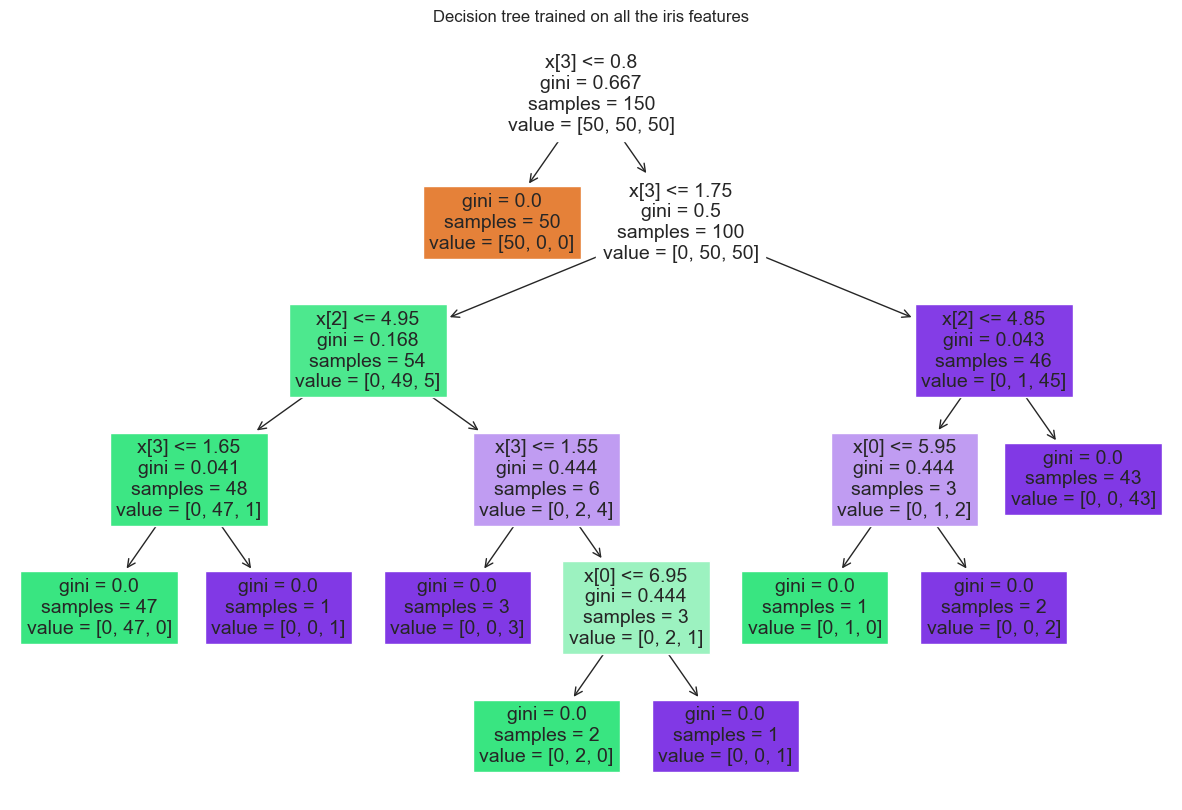

In [93]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [173]:
from sklearn import tree
X = [[0,0], [1,1]]
Y = [0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [177]:
clf.predict([[2, 2]])

array([1])

In [179]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

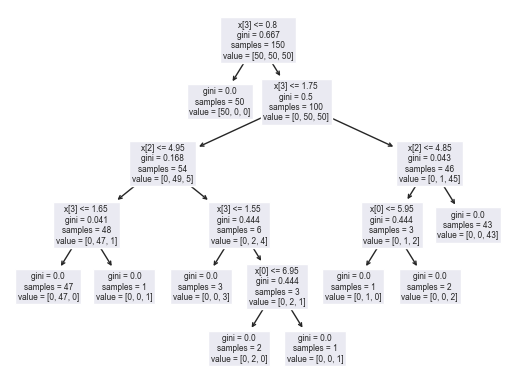

In [181]:
tree.plot_tree(clf)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

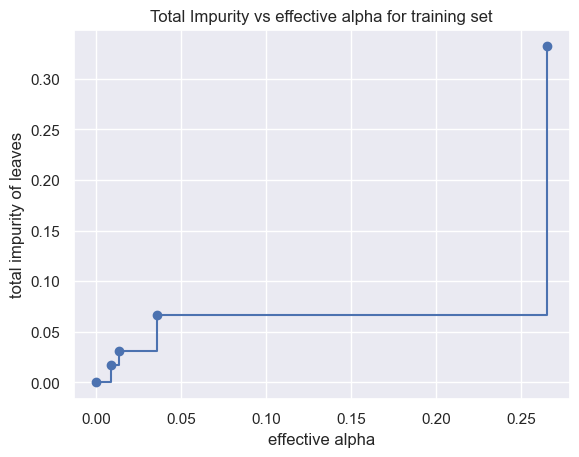

In [255]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [257]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.332795493197279


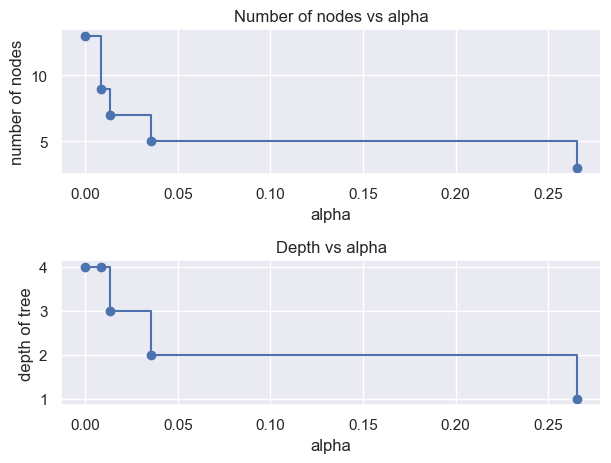

In [259]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

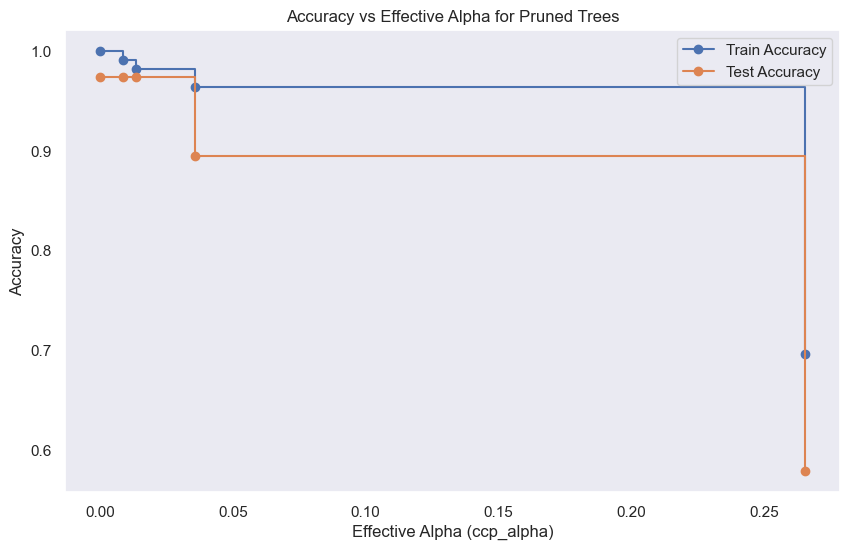

In [261]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load dataset and split into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train a decision tree and compute pruning path
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a sequence of decision trees with different ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Remove the last tree (it's a stump and not useful)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Evaluate accuracy on train and test sets
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Plot accuracy vs. ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker="o", label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="Test Accuracy", drawstyle="steps-post")
plt.xlabel("Effective Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Effective Alpha for Pruned Trees")
plt.legend()
plt.grid()
plt.show()

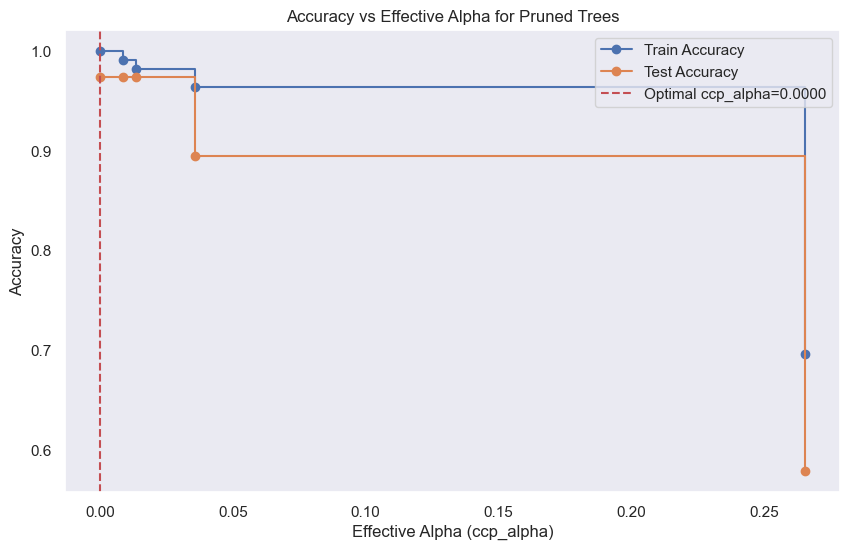

0.0

In [263]:
# Re-importing necessary libraries after reset
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load dataset and split into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train a decision tree and compute pruning path
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a sequence of decision trees with different ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Remove the last tree (it's a stump and not useful)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Evaluate accuracy on train and test sets
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Find the optimal ccp_alpha (where test accuracy is maximized)
optimal_index = test_scores.index(max(test_scores))
optimal_ccp_alpha = ccp_alphas[optimal_index]

# Plot accuracy vs. ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker="o", label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="Test Accuracy", drawstyle="steps-post")
plt.axvline(x=optimal_ccp_alpha, color='r', linestyle='--', label=f'Optimal ccp_alpha={optimal_ccp_alpha:.4f}')
plt.xlabel("Effective Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Effective Alpha for Pruned Trees")
plt.legend()
plt.grid()
plt.show()

optimal_ccp_alpha


In [265]:
# Train the final pruned tree with the optimal ccp_alpha
final_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=optimal_ccp_alpha)
final_clf.fit(X_train, y_train)

# Evaluate the final pruned tree
train_accuracy = final_clf.score(X_train, y_train)
test_accuracy = final_clf.score(X_test, y_test)

train_accuracy, test_accuracy

(1.0, 0.9736842105263158)

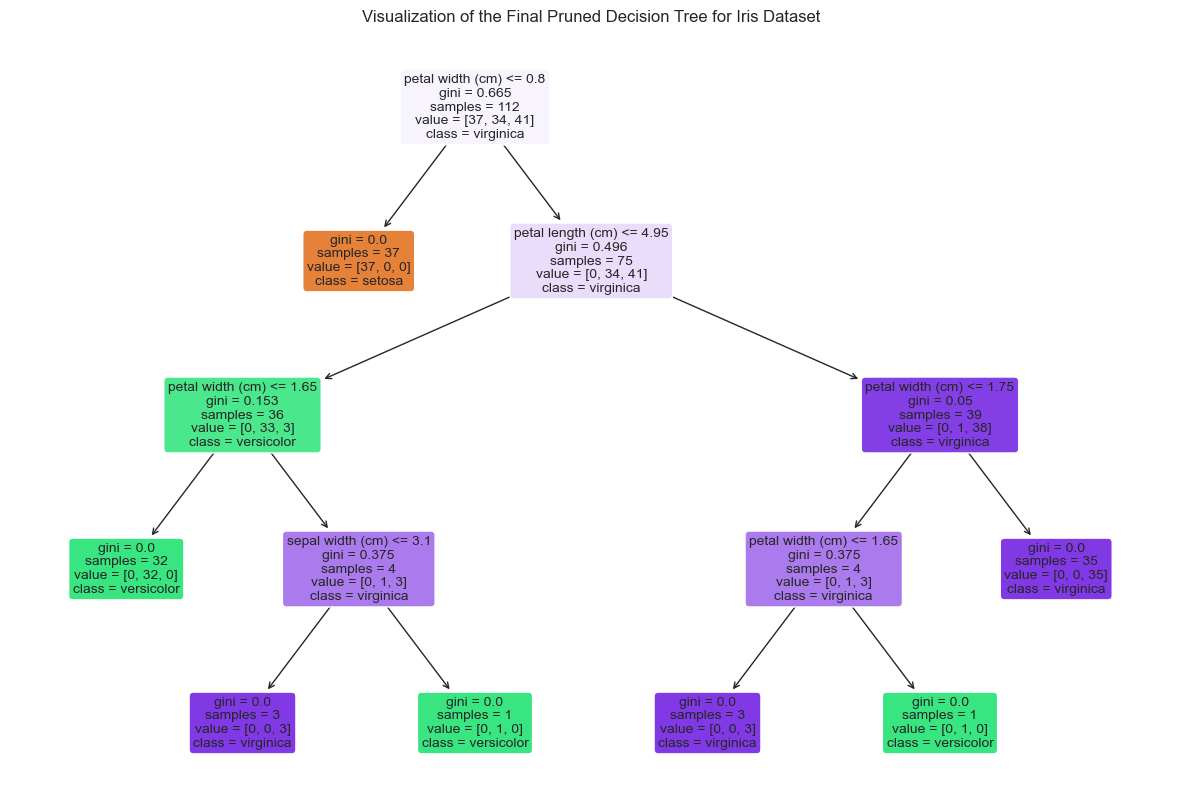

In [279]:
plt.figure(figsize=(15, 10))
plot_tree(
    final_clf,
    feature_names=load_iris().feature_names,  # Feature names are already a list
    class_names=load_iris().target_names.tolist(),  # Convert NumPy array to list
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualization of the Final Pruned Decision Tree for Iris Dataset")
plt.show()

In [281]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train the decision tree classifier
final_clf = DecisionTreeClassifier(random_state=0)
final_clf.fit(X_train, y_train)

# Perform predictions on the test set
y_pred = final_clf.predict(X_test)

# Generate classification report and confusion matrix
class_report = classification_report(y_test, y_pred, target_names=load_iris().target_names.tolist(), output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert classification report to DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Convert confusion matrix to DataFrame
conf_matrix_df = pd.DataFrame(
    conf_matrix, 
    index=['Actual Setosa', 'Actual Versicolor', 'Actual Virginica'], 
    columns=['Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica']
)

# Display the classification report and confusion matrix
print("**Classification Report**")
print(class_report_df)

print("\n**Confusion Matrix**")
print(conf_matrix_df)


**Classification Report**
              precision    recall  f1-score    support
setosa         1.000000  1.000000  1.000000  13.000000
versicolor     1.000000  0.937500  0.967742  16.000000
virginica      0.900000  1.000000  0.947368   9.000000
accuracy       0.973684  0.973684  0.973684   0.973684
macro avg      0.966667  0.979167  0.971703  38.000000
weighted avg   0.976316  0.973684  0.973952  38.000000

**Confusion Matrix**
                   Predicted Setosa  Predicted Versicolor  Predicted Virginica
Actual Setosa                    13                     0                    0
Actual Versicolor                 0                    15                    1
Actual Virginica                  0                     0                    9


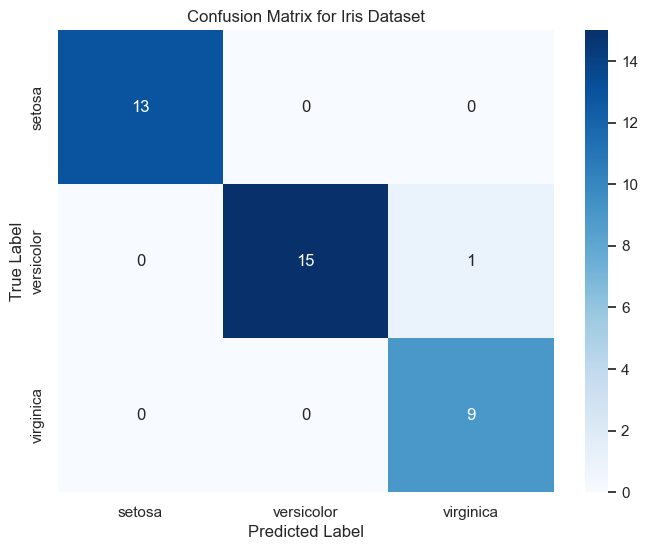

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the Iris dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train the decision tree classifier
final_clf = DecisionTreeClassifier(random_state=0)
final_clf.fit(X_train, y_train)

# Perform predictions on the test set
y_pred = final_clf.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=load_iris().target_names.tolist(), 
            yticklabels=load_iris().target_names.tolist())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Iris Dataset")
plt.show()


In [249]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

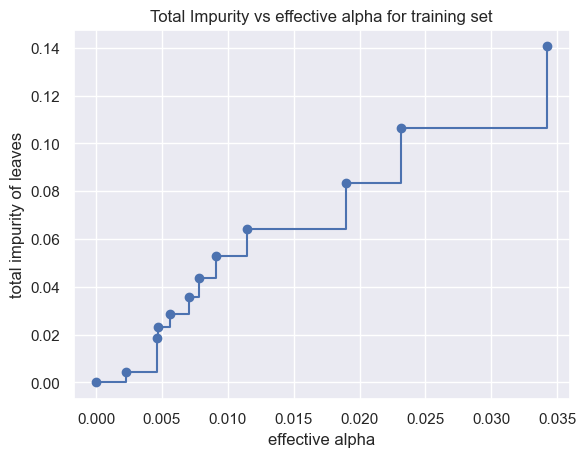

In [203]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [205]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


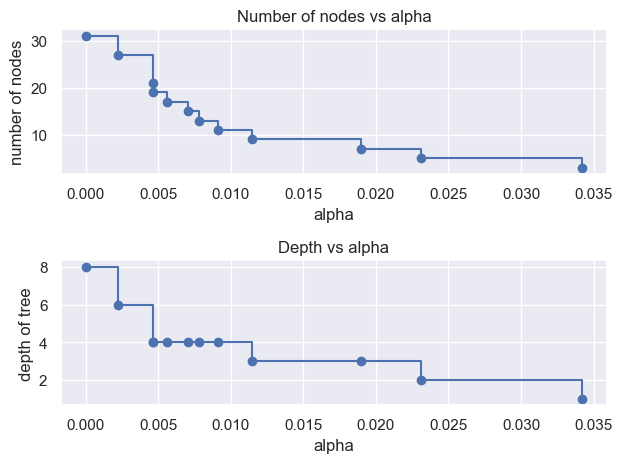

In [209]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

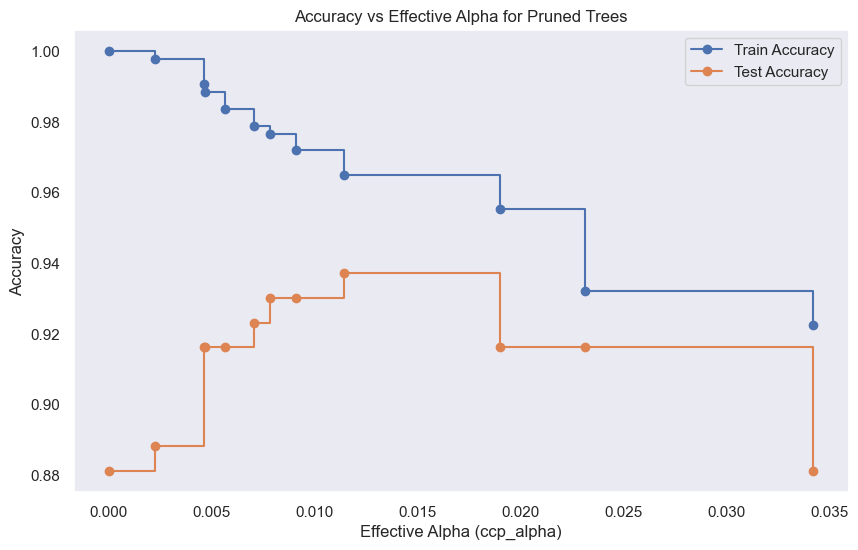

In [211]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load dataset and split into train and test sets
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train a decision tree and compute pruning path
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a sequence of decision trees with different ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Remove the last tree (it's a stump and not useful)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Evaluate accuracy on train and test sets
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Plot accuracy vs. ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker="o", label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="Test Accuracy", drawstyle="steps-post")
plt.xlabel("Effective Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Effective Alpha for Pruned Trees")
plt.legend()
plt.grid()
plt.show()

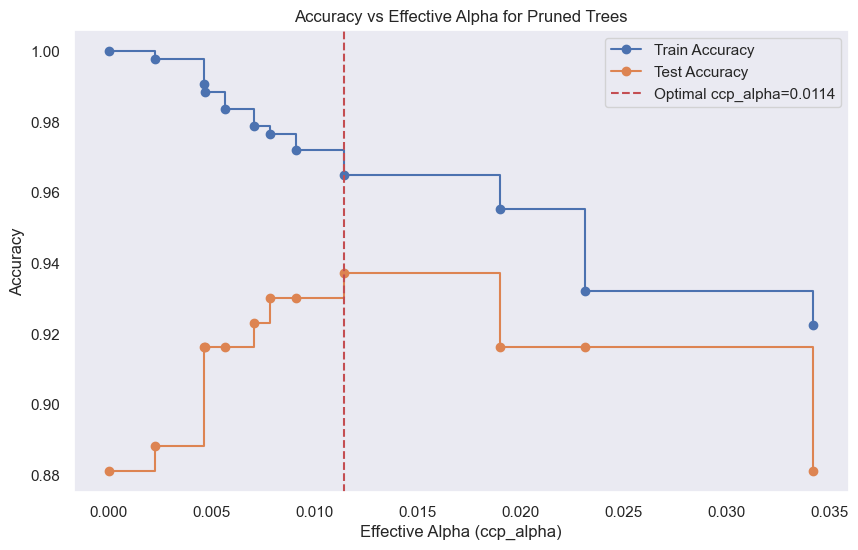

0.011443661971830986

In [213]:
# Re-importing necessary libraries after reset
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load dataset and split into train and test sets
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train a decision tree and compute pruning path
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a sequence of decision trees with different ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Remove the last tree (it's a stump and not useful)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Evaluate accuracy on train and test sets
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Find the optimal ccp_alpha (where test accuracy is maximized)
optimal_index = test_scores.index(max(test_scores))
optimal_ccp_alpha = ccp_alphas[optimal_index]

# Plot accuracy vs. ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker="o", label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="Test Accuracy", drawstyle="steps-post")
plt.axvline(x=optimal_ccp_alpha, color='r', linestyle='--', label=f'Optimal ccp_alpha={optimal_ccp_alpha:.4f}')
plt.xlabel("Effective Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Effective Alpha for Pruned Trees")
plt.legend()
plt.grid()
plt.show()

optimal_ccp_alpha


In [215]:
# Train the final pruned tree with the optimal ccp_alpha
final_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=optimal_ccp_alpha)
final_clf.fit(X_train, y_train)

# Evaluate the final pruned tree
train_accuracy = final_clf.score(X_train, y_train)
test_accuracy = final_clf.score(X_test, y_test)

train_accuracy, test_accuracy


(0.9647887323943662, 0.9370629370629371)

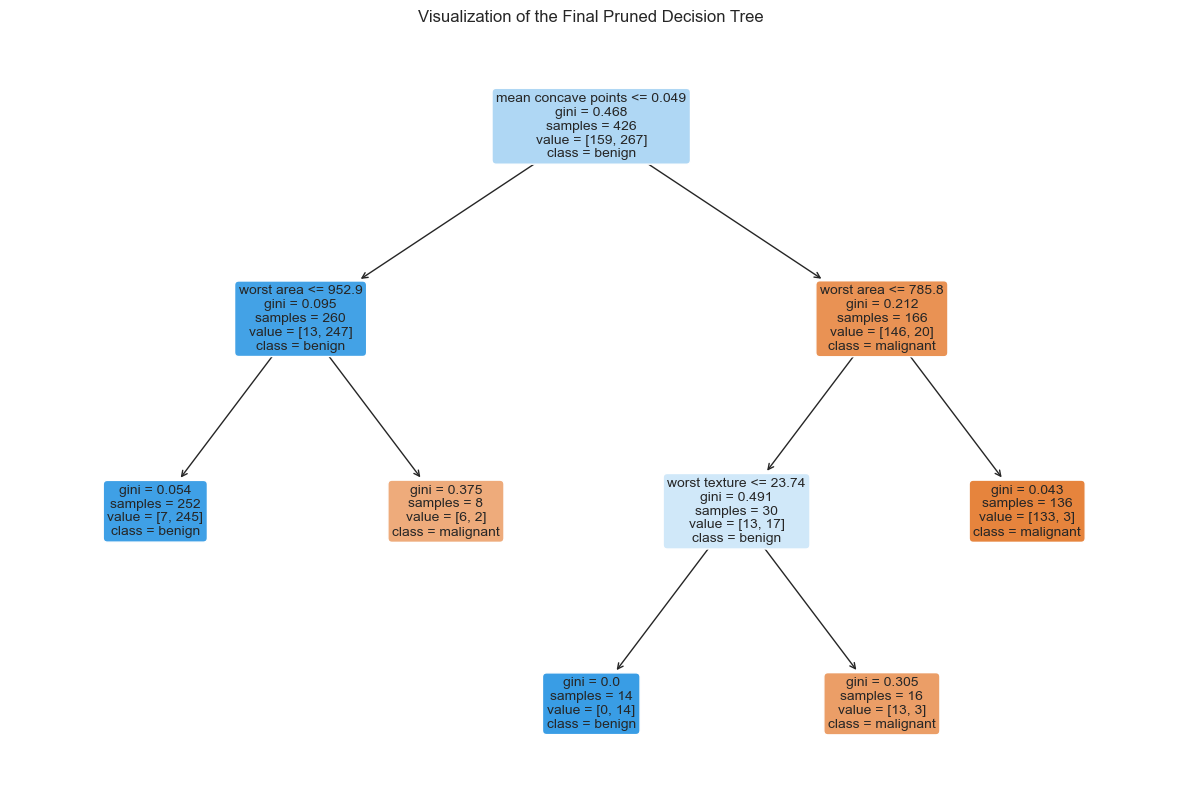

In [223]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the structure of the final pruned tree
plt.figure(figsize=(15, 10))
plot_tree(
    final_clf,
    feature_names=load_breast_cancer().feature_names.tolist(),  # Convert to list
    class_names=load_breast_cancer().target_names.tolist(),  # Convert to list
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualization of the Final Pruned Decision Tree")
plt.show()


In [231]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Perform predictions on the test set
y_pred = final_clf.predict(X_test)

# Generate classification report and confusion matrix
class_report = classification_report(y_test, y_pred, target_names=load_breast_cancer().target_names.tolist(), output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert classification report to DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Convert confusion matrix to DataFrame
conf_matrix_df = pd.DataFrame(
    conf_matrix, 
    index=['Actual Malignant', 'Actual Benign'], 
    columns=['Predicted Malignant', 'Predicted Benign']
)

# Display the classification report and confusion matrix
print("**Classification Report**")
print(class_report_df)

print("\n**Confusion Matrix**")
print(conf_matrix_df)

**Classification Report**
              precision    recall  f1-score     support
malignant      0.866667  0.981132  0.920354   53.000000
benign         0.987952  0.911111  0.947977   90.000000
accuracy       0.937063  0.937063  0.937063    0.937063
macro avg      0.927309  0.946122  0.934165  143.000000
weighted avg   0.943000  0.937063  0.937739  143.000000

**Confusion Matrix**
                  Predicted Malignant  Predicted Benign
Actual Malignant                   52                 1
Actual Benign                       8                82


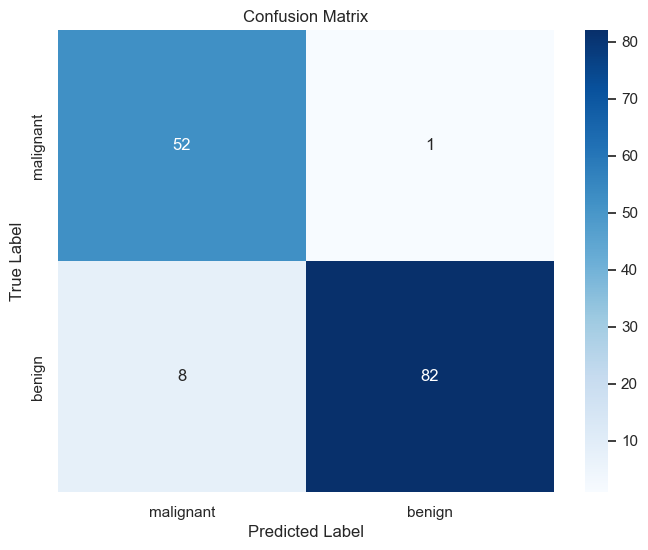

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=load_breast_cancer().target_names.tolist(), yticklabels=load_breast_cancer().target_names.tolist())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
